In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## #Loading Dataset


In [4]:
# Train dataset
df_train = pd.read_csv("train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#test dataset
df_test = pd.read_csv("test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## #Inspecting Data

In [6]:
print("df_df_train shape:",df_train.shape)
print("df_test shape:",df_test.shape)

df_df_train shape: (1460, 81)
df_test shape: (1459, 80)


In [7]:
print("df_train duplicate:",df_train.duplicated().sum())
print("df_test duplicate:",df_test.duplicated().sum())

df_train duplicate: 0
df_test duplicate: 0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [11]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [12]:
# df_train.isna().sum().sort_values(ascending=False).head(25)
    

In [13]:
# print(df_train.count())
# print(df_train.count())

In [14]:
total_null = df_train.isna().sum().sort_values(ascending=False)
percentage = ((df_train.isna().sum()/df_train.isna().count())*100).sort_values(ascending=False)
null_col = pd.concat([total_null,percentage],axis=1,keys=["total","percentage"])
# display(null_col.head(25))
null_col.head(20)
# Here top 4 columns contains very less information so we will drop this features

total  percentage
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageYrBlt      81    5.547945
GarageCond       81    5.547945
GarageType       81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
BsmtFinType2     38    2.602740
BsmtExposure     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
MasVnrType        8    0.547945
Electrical        1    0.068493
Id                0    0.000000

In [15]:
total_null = df_test.isnull().sum().sort_values(ascending=False)
percentage = (df_test.isnull().sum()/df_test.isna().count()).sort_values(ascending=False)
null_col = pd.concat([total_null,percentage],axis=1,keys=["total","percentage"])
# display(null_col.head(25))
null_col.head(40)
#Will drop top 4 features 

total  percentage
PoolQC         1456    0.997944
MiscFeature    1408    0.965045
Alley          1352    0.926662
Fence          1169    0.801234
FireplaceQu     730    0.500343
LotFrontage     227    0.155586
GarageYrBlt      78    0.053461
GarageQual       78    0.053461
GarageFinish     78    0.053461
GarageCond       78    0.053461
GarageType       76    0.052090
BsmtCond         45    0.030843
BsmtQual         44    0.030158
BsmtExposure     44    0.030158
BsmtFinType1     42    0.028787
BsmtFinType2     42    0.028787
MasVnrType       16    0.010966
MasVnrArea       15    0.010281
MSZoning          4    0.002742
BsmtHalfBath      2    0.001371
Utilities         2    0.001371
Functional        2    0.001371
BsmtFullBath      2    0.001371
BsmtFinSF1        1    0.000685
BsmtFinSF2        1    0.000685
BsmtUnfSF         1    0.000685
KitchenQual       1    0.000685
TotalBsmtSF       1    0.000685
Exterior2nd       1    0.000685
GarageCars        1    0.000685
Exterior1st       1    0.000685
GarageArea        1    0.000685
SaleType          1    0.000685
MiscVal           0    0.000000
BedroomAbvGr      0    0.000000
KitchenAbvGr      0    0.000000
YrSold            0    0.000000
TotRmsAbvGrd      0    0.000000
MoSold            0    0.000000
Fireplaces        0    0.000000

In [16]:
for col in df_train.select_dtypes(include=object).columns:
    print(col,":",df_train[col].unique(),"-"*30,len(df_train[col].unique()))
    print("\n")
#Exploring categorical feature values

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH'] ------------------------------ 5


Street : ['Pave' 'Grvl'] ------------------------------ 2


Alley : [nan 'Grvl' 'Pave'] ------------------------------ 3


LotShape : ['Reg' 'IR1' 'IR2' 'IR3'] ------------------------------ 4


LandContour : ['Lvl' 'Bnk' 'Low' 'HLS'] ------------------------------ 4


Utilities : ['AllPub' 'NoSeWa'] ------------------------------ 2


LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] ------------------------------ 5


LandSlope : ['Gtl' 'Mod' 'Sev'] ------------------------------ 3


Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] ------------------------------ 25


Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] ------------------------------ 9


Condition2 : ['N

In [17]:
# df_unique = pd.DataFrame(data={
                            # 'Unique Values': [df_train[col].unique() for col in df_train.select_dtypes(include="object").columns]},
                            # index=df_train.select_dtypes(include="object").columns)
# df_unique

In [18]:
for col in df_train.select_dtypes(include='number').columns:
    print(col,":",df_train[col].unique(),"-"*30,len(df_train[col].unique()))
    print("\n")
#Exploring numerical feature values

Id : [   1    2    3 ... 1458 1459 1460] ------------------------------ 1460


MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] ------------------------------ 15


LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] ------------------------------ 111


LotArea : [ 8450  9600 11250 ... 17217 13175  9717] ------------------------------ 1073


OverallQual : [ 7  6  8  5  9  4 10  3  1  2] ------------------------------ 10


OverallCond : [5 8 6 7 

## #Preprocessing

In [19]:
# lt = []
# for i,j in df_train.count().items():
#     if j <  (1460*0.3):
#         lt.append(i)
# lt
        
        

In [20]:
#This features contains very less information.
df_train.drop(columns=['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)
df_test.drop(columns=['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)



In [21]:
print(df_train.shape)
print(df_test.shape)

(1460, 76)
(1459, 75)


In [22]:
fillna_cat = []
for col in df_train.select_dtypes(exclude='number').columns:
    if df_train[col].isna().any():
        fillna_cat.append(col)
        print(col,df_train[col].isna().sum())
fillna_cat
# Listing Categorical Features

MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [23]:
#Extracting Features which contain "NA" value
fillNa_cat = ['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']



In [24]:
#Filling na values with "NA"
df_train[fillNa_cat] = df_train[fillNa_cat].fillna("NA")
df_test[fillNa_cat] = df_test[fillNa_cat].fillna("NA")

In [25]:
# print(df_train.isna().sum())
# print("*"*30)
test_na =[]
for col in df_test.columns:
    if df_test[col].isna().any():
        test_na.append(col)
#         print(col)
print(test_na)
# All the features containing null values in test dataset

['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']


In [26]:
#Features whose null values replaced with zero
fillna_num= ['MasVnrArea', 'GarageYrBlt','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
 'BsmtHalfBath','GarageArea','GarageCars', 'BsmtFinSF1',
 'BsmtFinSF2']

In [27]:
df_train[fillna_num] = df_train[fillna_num].fillna(0)
df_test[fillna_num] = df_test[fillna_num].fillna(0)

In [28]:
#Features whose null values replaced with zero
fillna_mode = ['Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd',
 'KitchenQual',
 'Functional',
  'SaleType']

In [29]:
print(df_train.isna().sum())
print("*"*100)
print(df_test.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [30]:
df_train["Electrical"]= df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])
df_test["MSZoning"]= df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])
df_test["Utilities"]= df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])
df_test["Exterior1st"]= df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])
df_test["Exterior2nd"]= df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])
df_test["KitchenQual"]= df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])
df_test["Functional"]= df_test["Functional"].fillna(df_test["Functional"].mode()[0])
df_test["SaleType"]= df_test["SaleType"].fillna(df_test["SaleType"].mode()[0])


In [31]:
df_train.LotFrontage.fillna(df_train.LotFrontage.mean(),inplace=True)
df_test.LotFrontage.fillna(df_train.LotFrontage.mean(),inplace=True)

In [32]:
# fillna_num = []
# for col in df_train.select_dtypes(exclude='object').columns:
#     if df_train[col].isna().any():
#         fillna_num.append(col)
#         print(col,df_train[col].isna().sum())
# fillna_num

In [33]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


## #Exploratory Data Analysis(EDA)

In [34]:
#Spliting features into categorical and numerical feature
cat_features = df_train.select_dtypes(exclude='number')
num_features = df_train.select_dtypes(include='number')

In [35]:
print(cat_features.shape) 
print(num_features.shape)

(1460, 39)
(1460, 37)


In [36]:
from scipy.stats import skew

In [37]:
num_features.shape

(1460, 37)

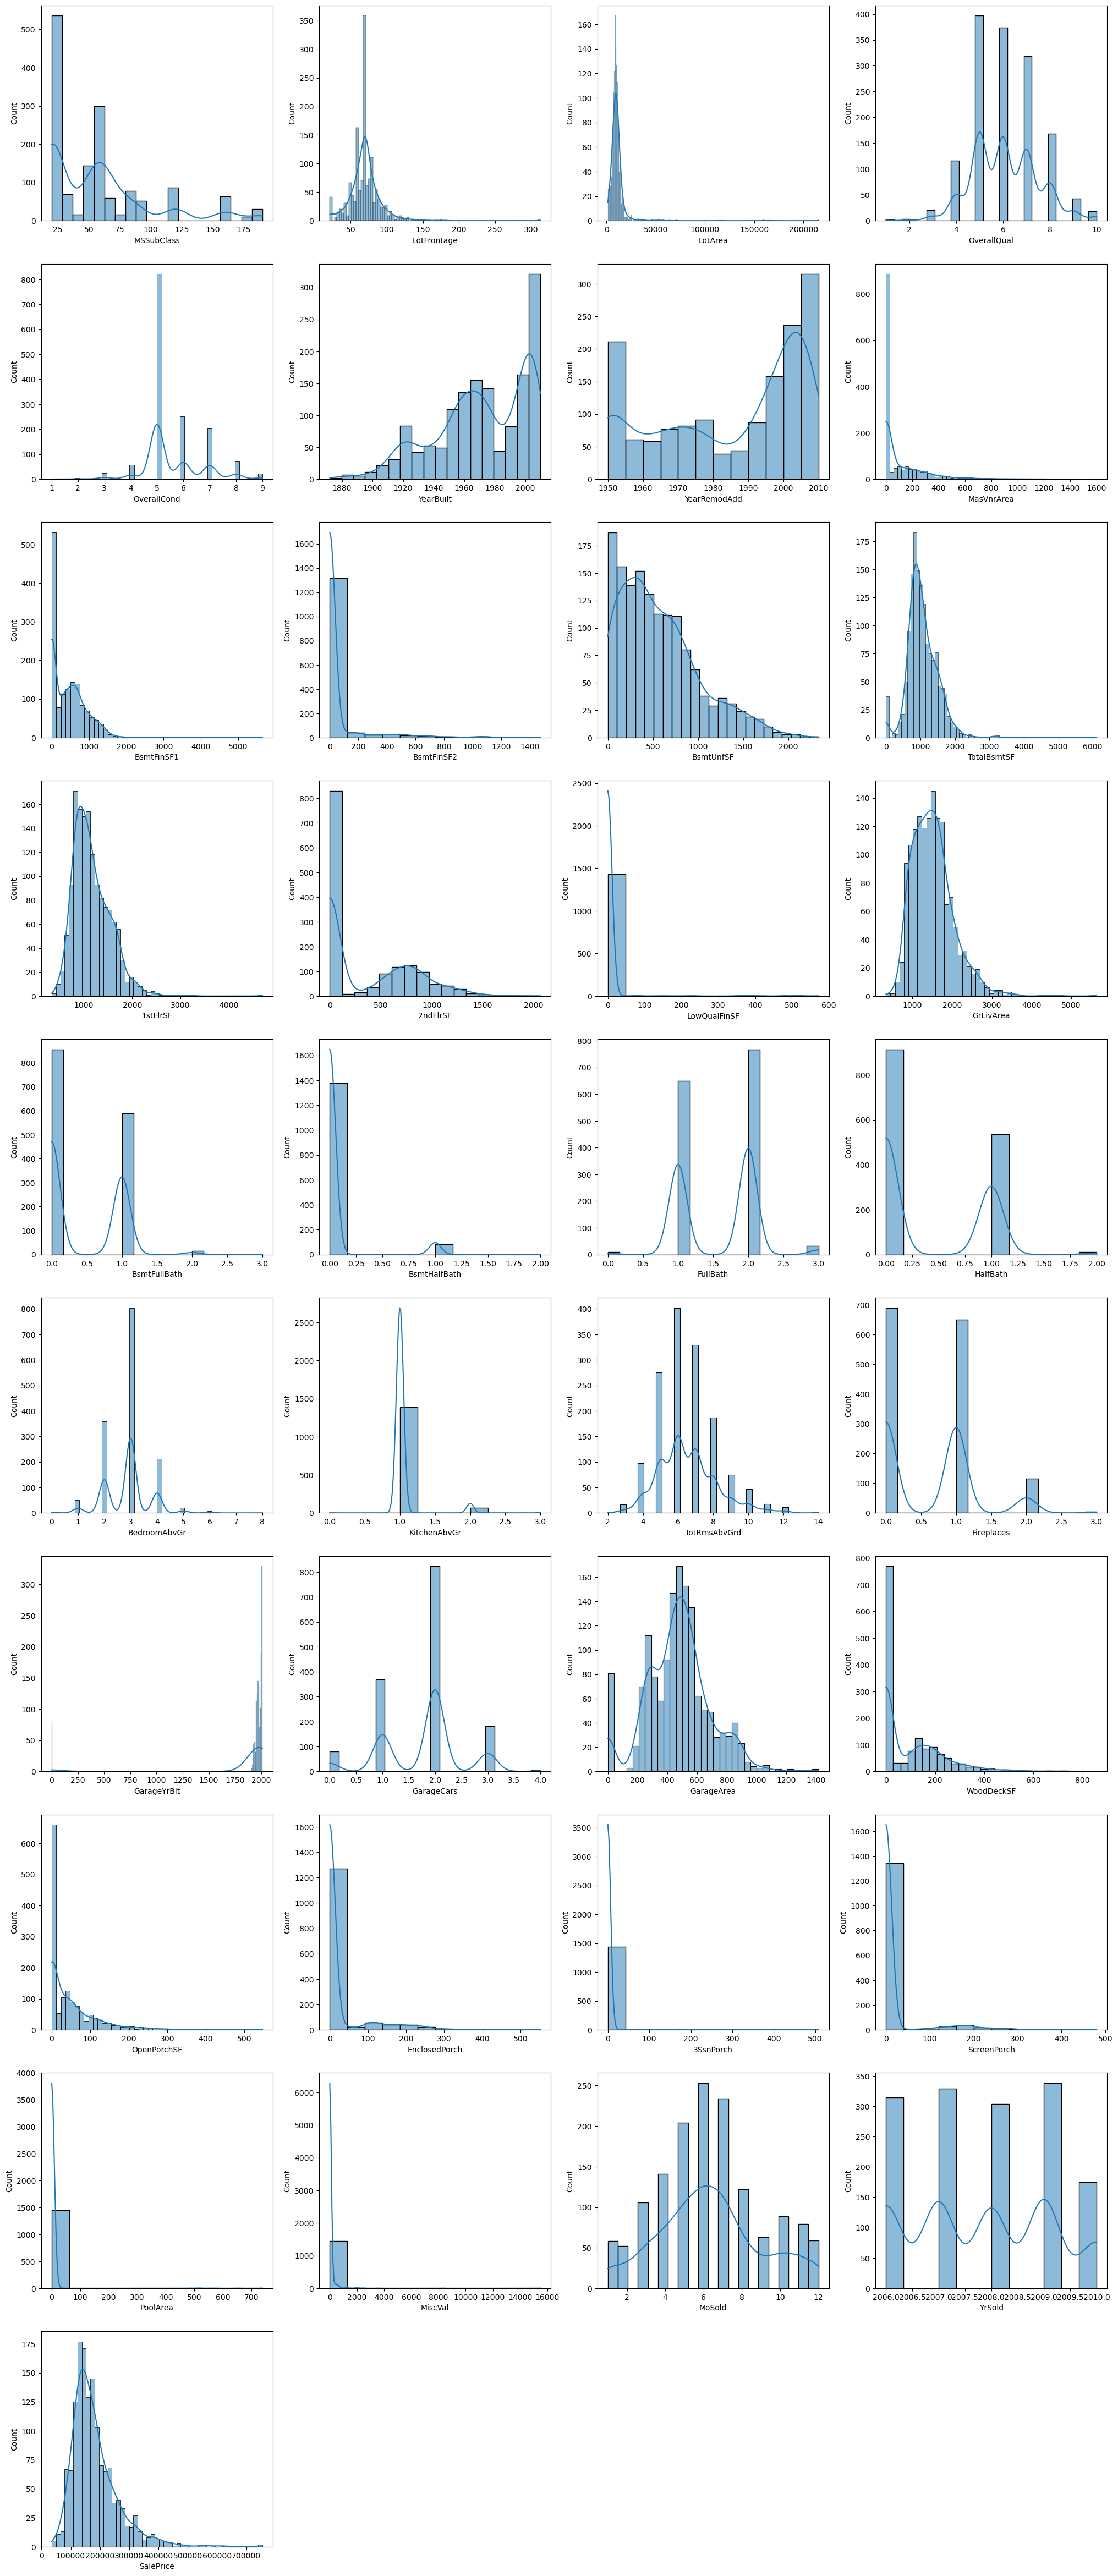

In [38]:
plt.figure(figsize=(25,60))
i=1
for col in num_features:
    plt.subplot(10,4,i)
#     print("Skewness of",col," : ",skew(num_features[col]))
    sns.histplot(num_features[col],kde=True)
    i+=1 
# getting distribution of different numeral features

Numerical Features which is having continuous value are not normally distributed and are left skewed that need to be work on.

Also some of the features contains inforamtion with zero values

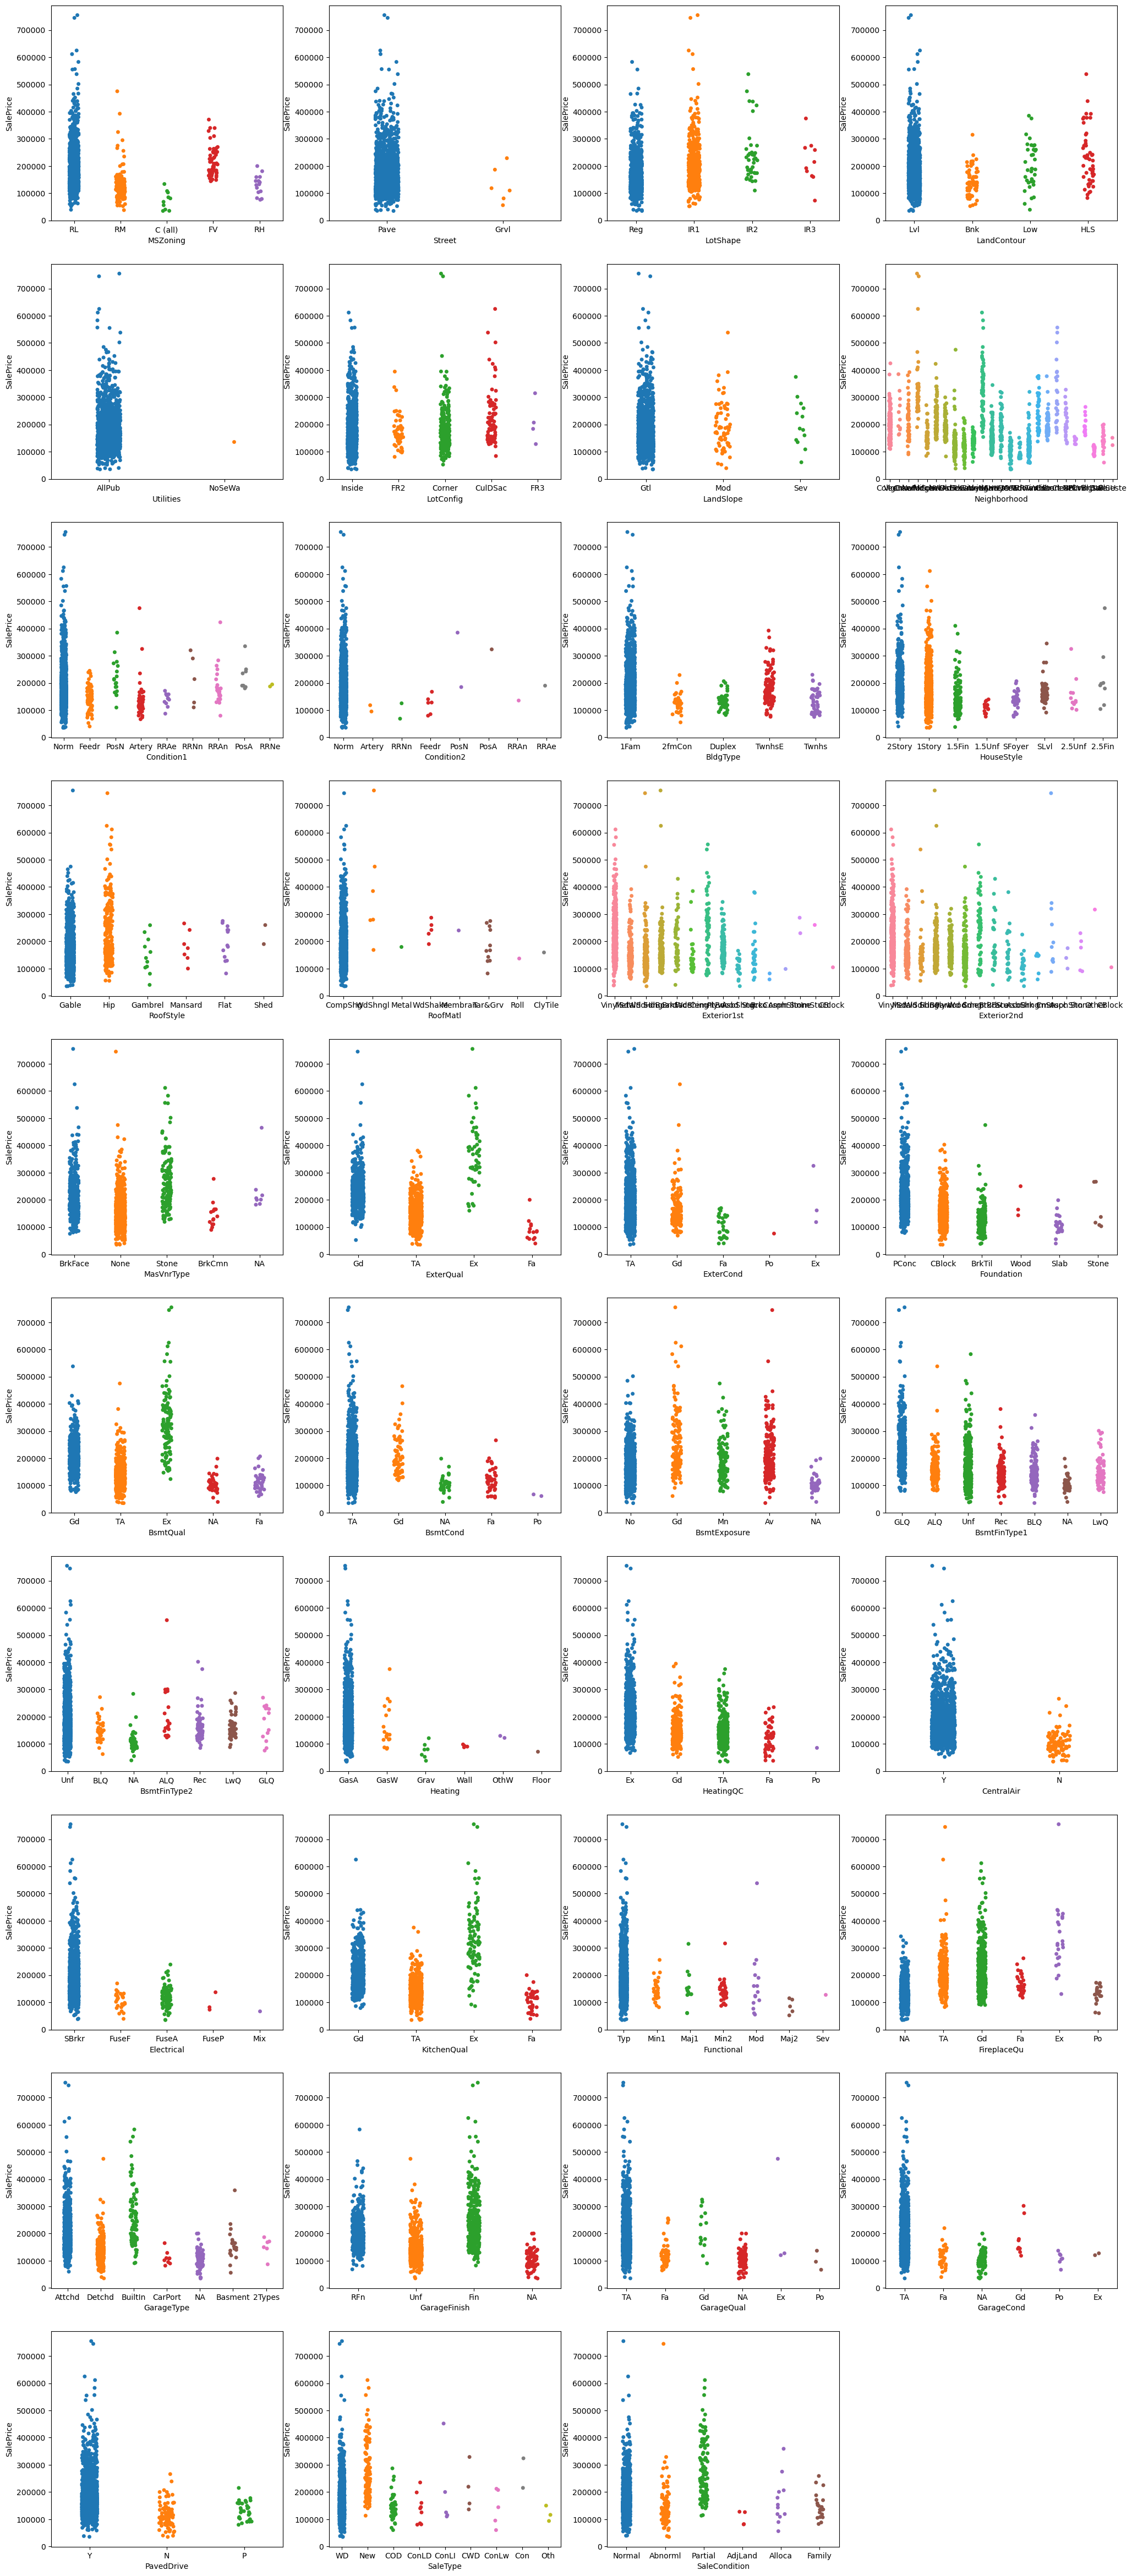

In [39]:
plt.figure(figsize=(25,60))
i=1
for col in cat_features:
    plt.subplot(10,4,i)
    sns.stripplot(data=df_train,x=col,y="SalePrice")
    i+=1
    

kurtosis  :  6.509812011089439
skewness  :  1.880940746034036


<Figure size 640x480 with 0 Axes>

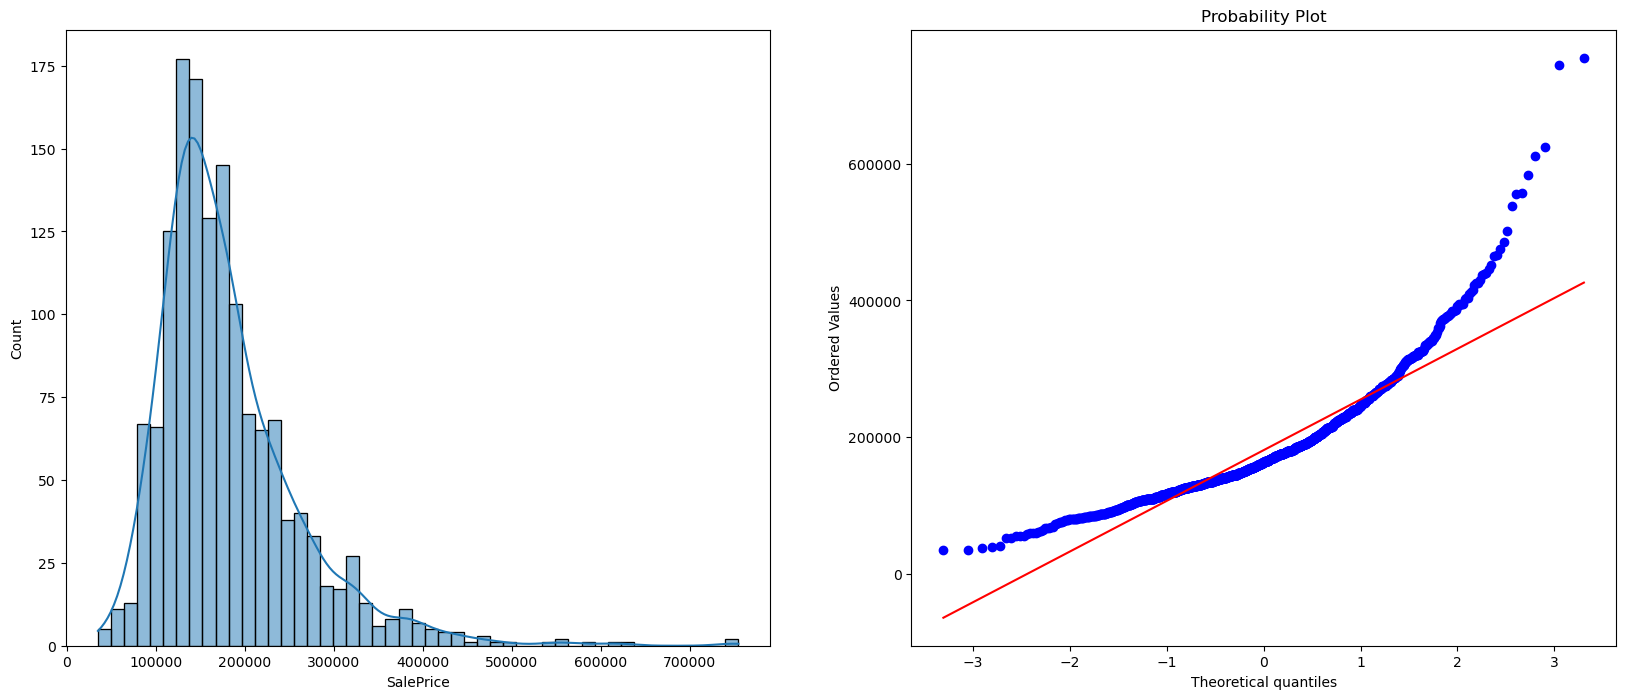

In [40]:
from scipy.stats import kurtosis
plt.figure()
print("kurtosis"," : ",kurtosis(df_train['SalePrice']))
print("skewness"," : ",skew(df_train['SalePrice']))
import scipy.stats as stats
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(df_train['SalePrice'],kde=True)
plt.subplot(1,2,2)
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)

plt.show()

SalePrice feature is left skewed and the qqplot is appearing non linear 

In [41]:
#Applying Logrithmic Transformation 
log_salePrice = np.log(df_train["SalePrice"])

kurtosis  :  0.8026555069117713
skewness  :  0.1212103673013655


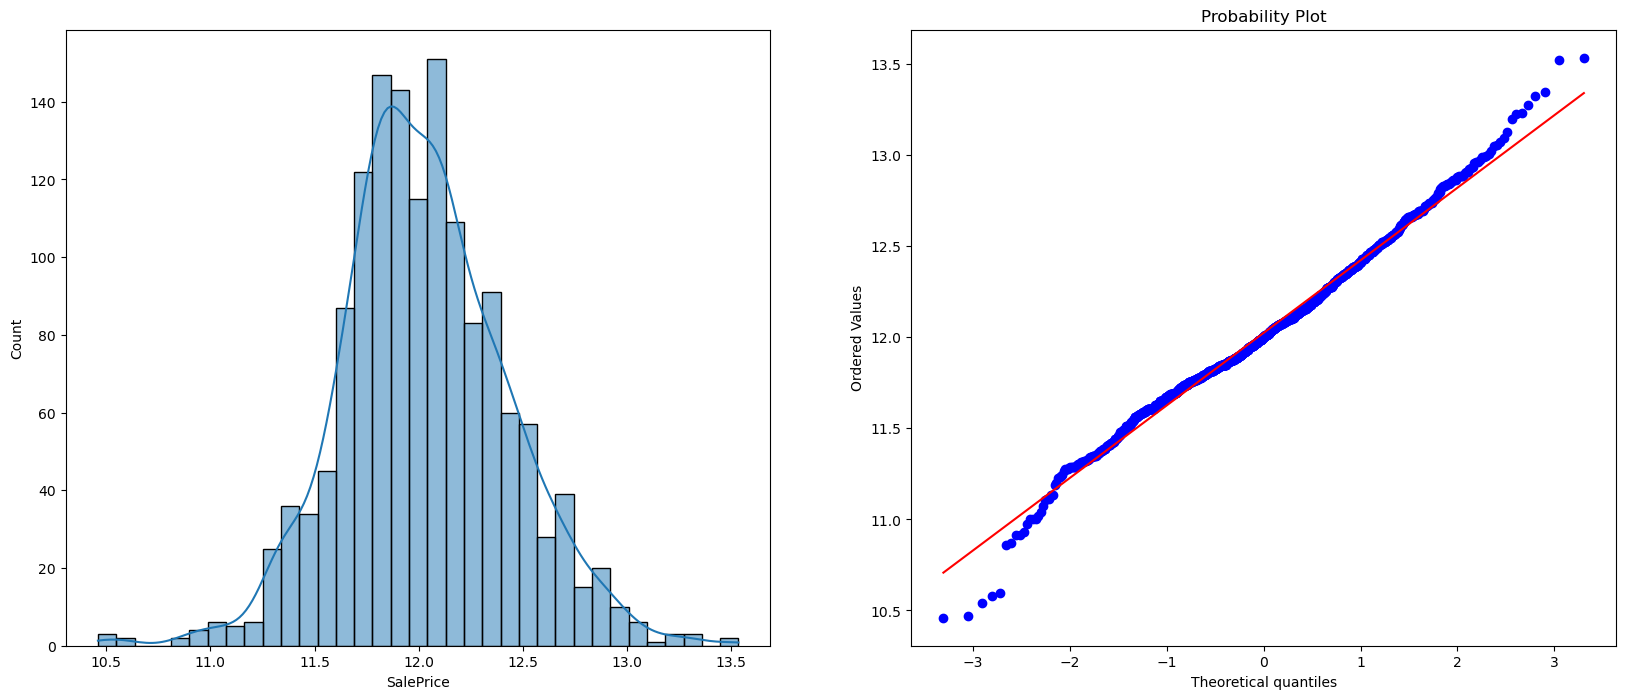

In [42]:
from scipy.stats import kurtosis
import scipy.stats as stats
print("kurtosis"," : ",kurtosis(log_salePrice))
print("skewness"," : ",skew(log_salePrice))
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(log_salePrice,kde=True)
plt.subplot(1,2,2)
stats.probplot(log_salePrice, dist="norm", plot=plt)
plt.show()

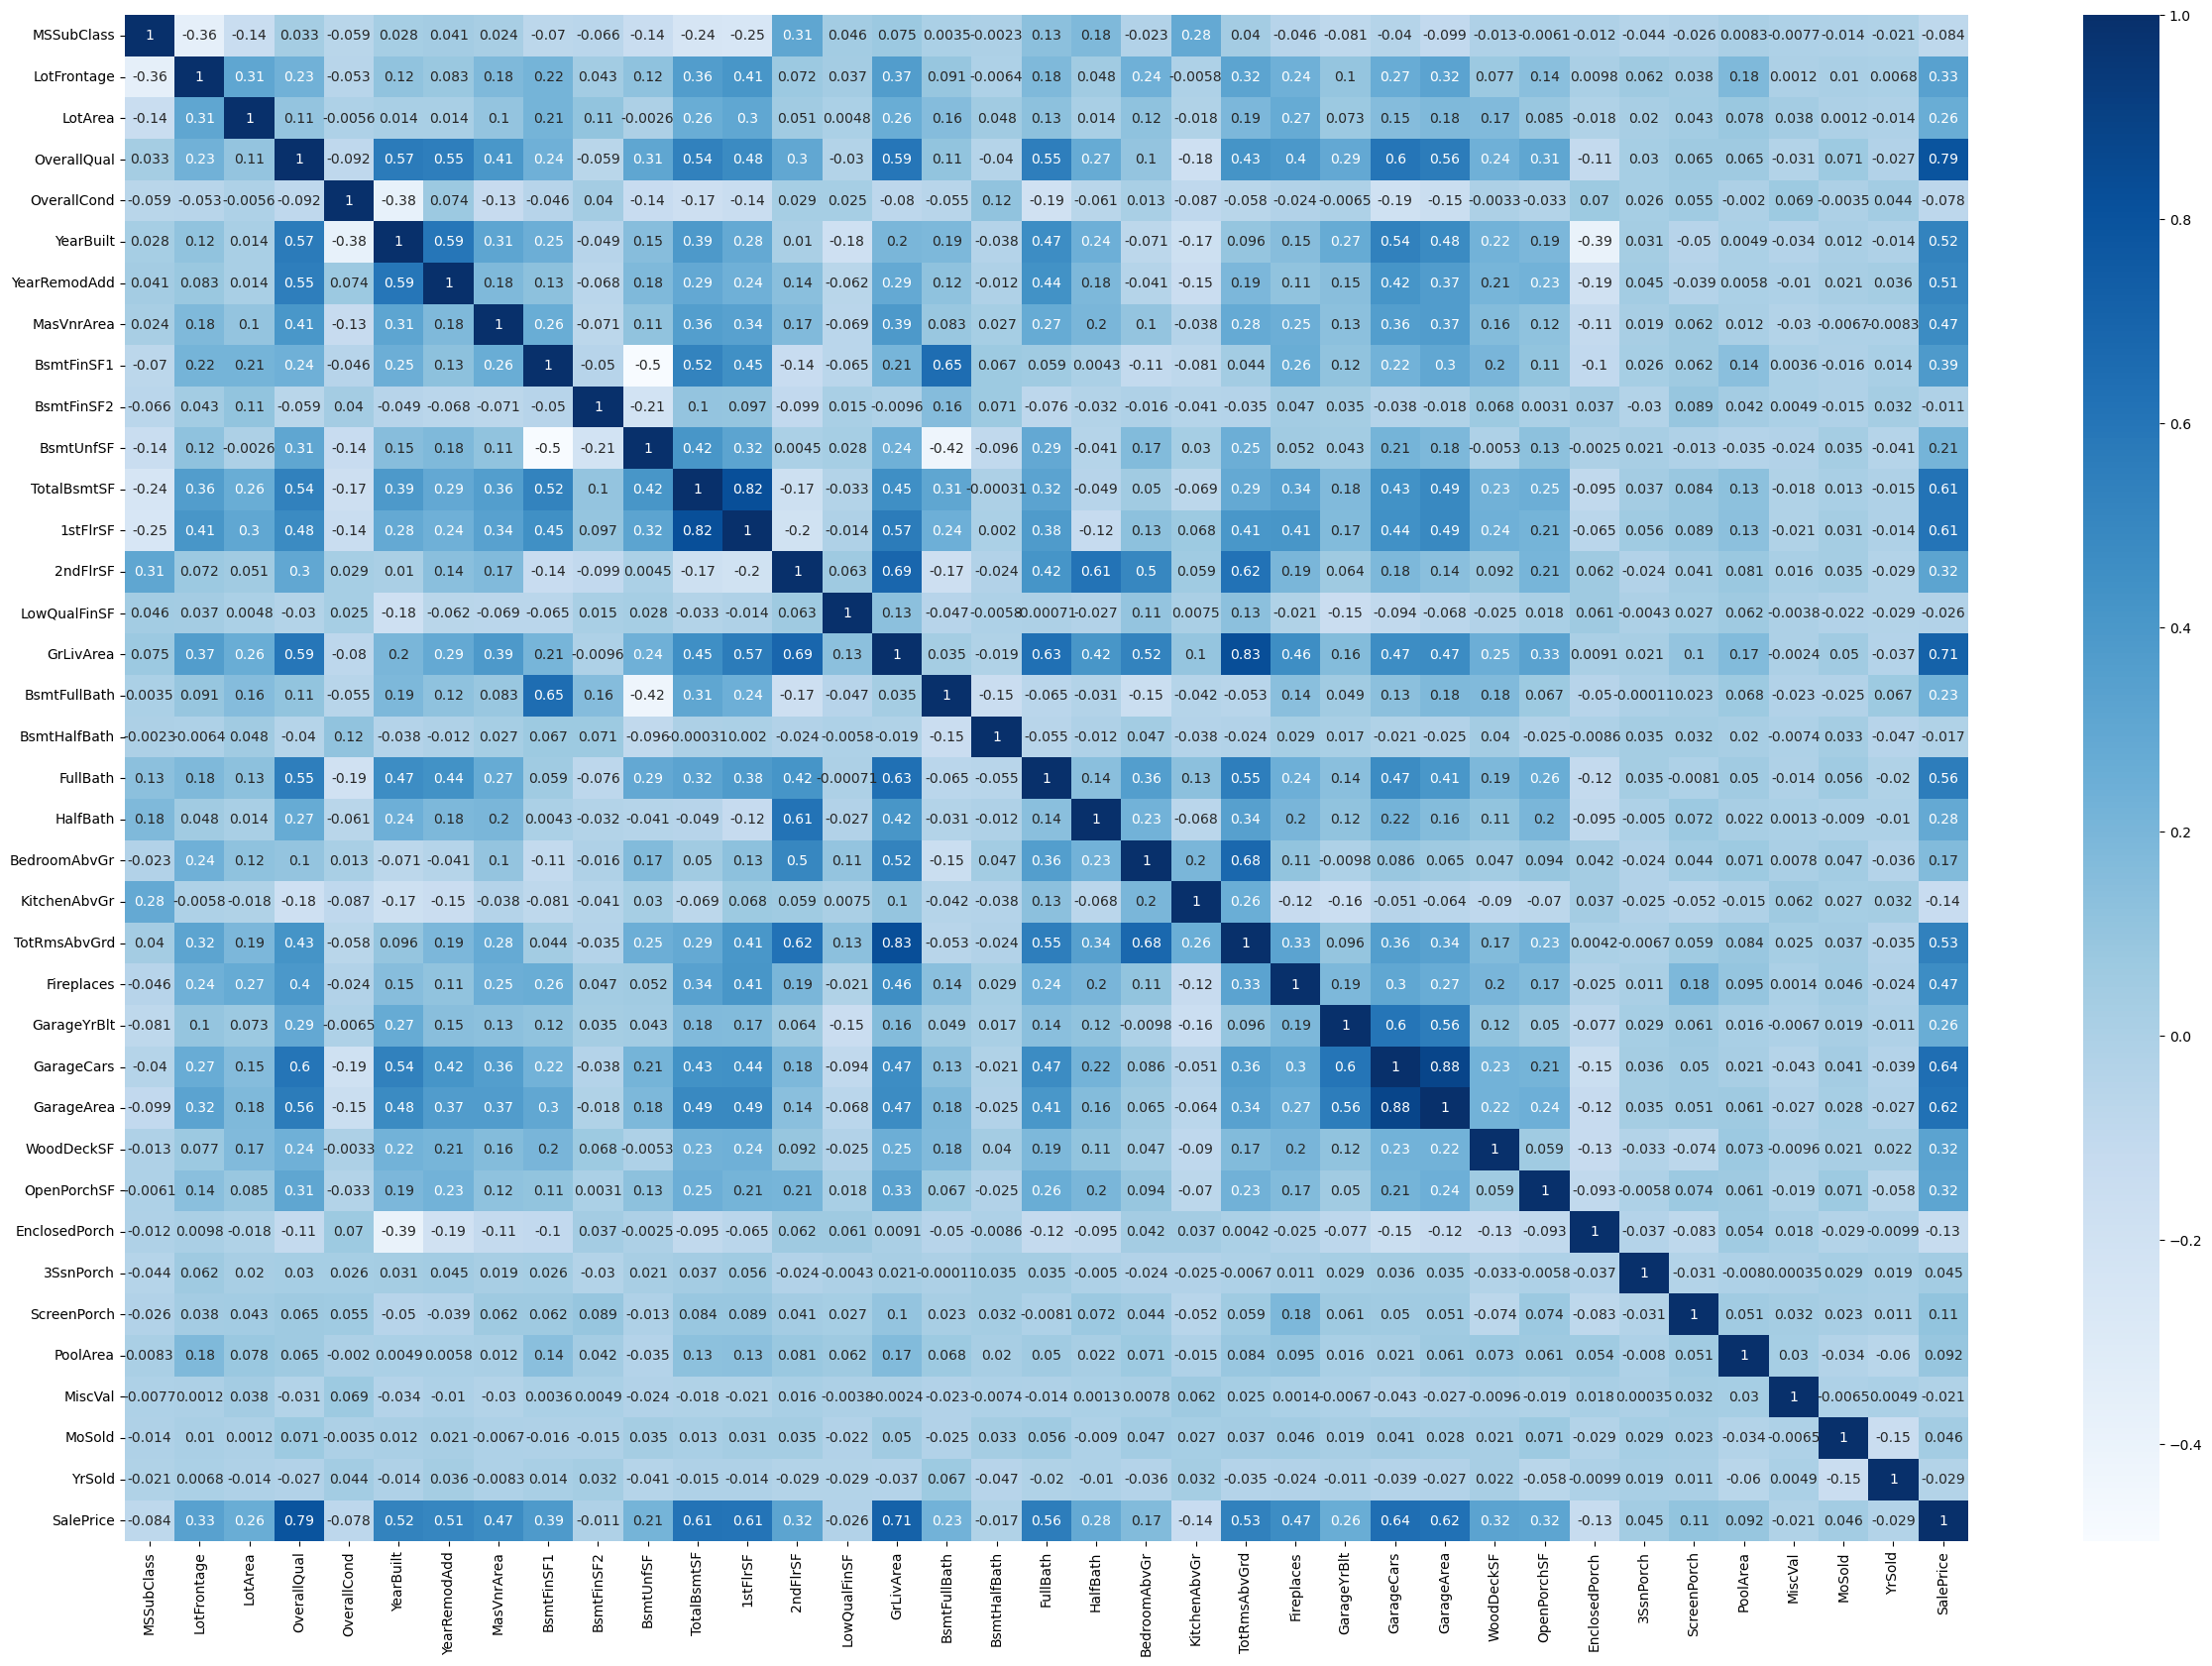

In [43]:
plt.figure(figsize=(30, 20))
sns.heatmap(data=df_train.corr(), cmap='Blues',annot=True)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

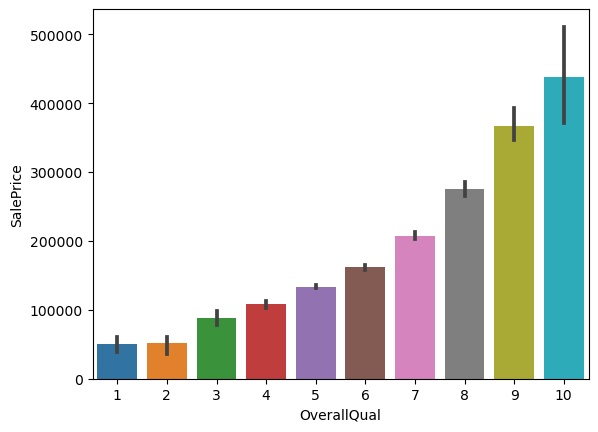

In [44]:
sns.barplot(data=df_train,x="OverallQual",y="SalePrice")

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

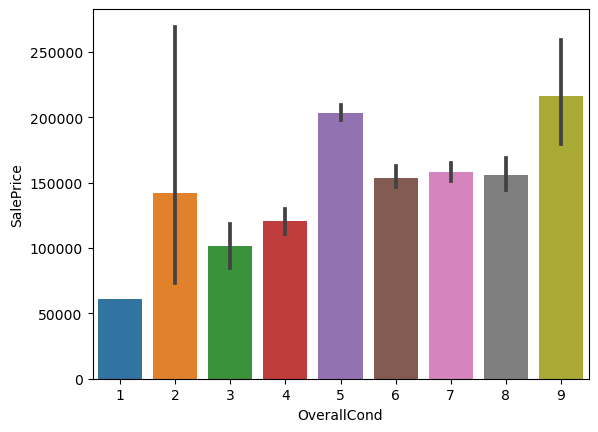

In [45]:
sns.barplot(data=df_train,x="OverallCond",y="SalePrice")

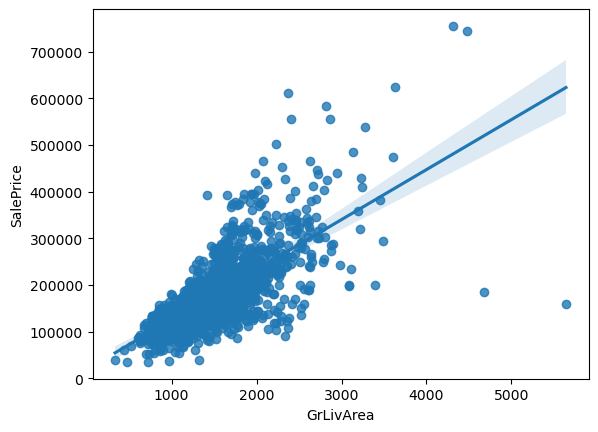

In [46]:
sns.regplot(data=df_train,x="GrLivArea",y="SalePrice")
plt.show()

In [47]:
df_train[df_train["GrLivArea"]>5000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1298          60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1298       Hip  ClyTile      Stucco      Stucco      Stone       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1298        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1298          GLQ        5644          Unf           0        466   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1298         6110    GasA        Ex          Y      SBrkr      4692       950   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1298             0       5642             2             0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1298             3             1          Ex            12        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1298           3          Gd     Attchd       2008.0          Fin           2   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1298        1418         TA         TA          Y         214          292   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1298              0          0            0       480        0       1   

      YrSold SaleType SaleCondition  SalePrice  
1298    2008      New       Partial     160000

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

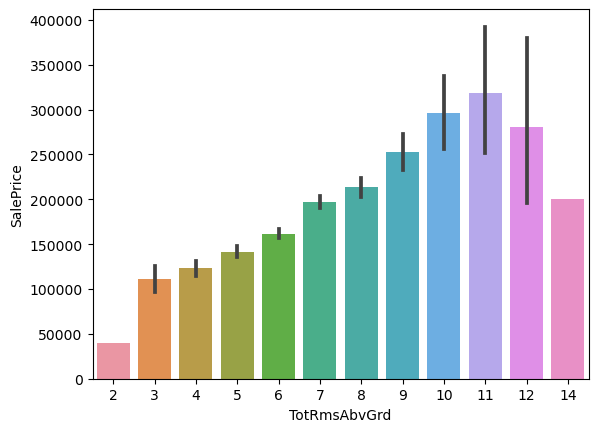

In [48]:
sns.barplot(data=df_train,x="TotRmsAbvGrd",y="SalePrice")

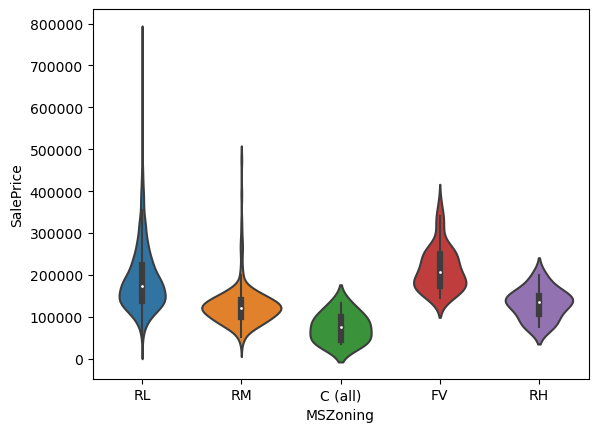

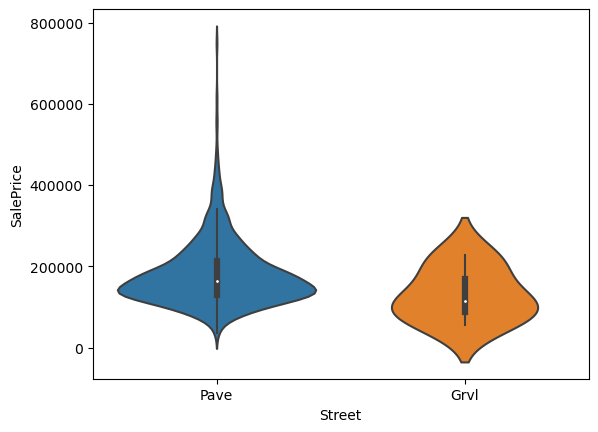

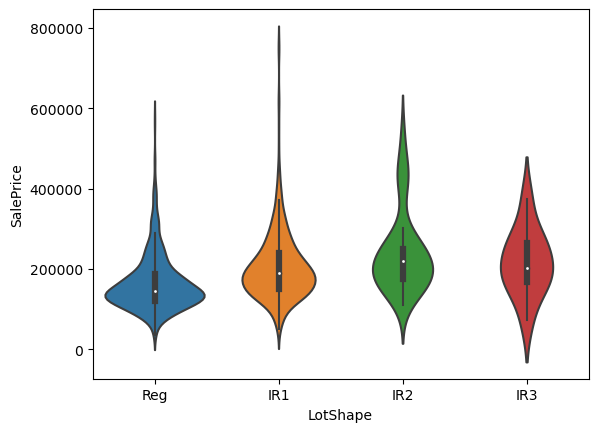

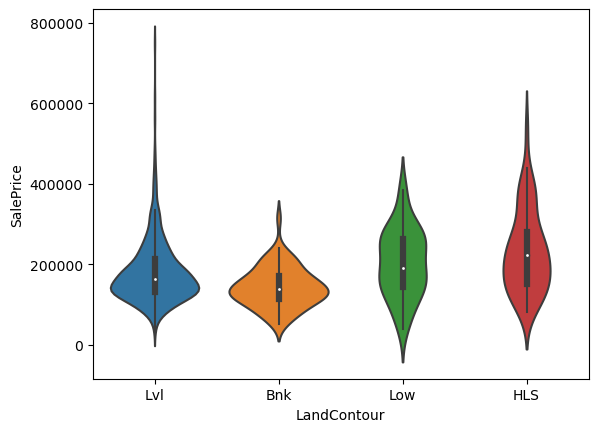

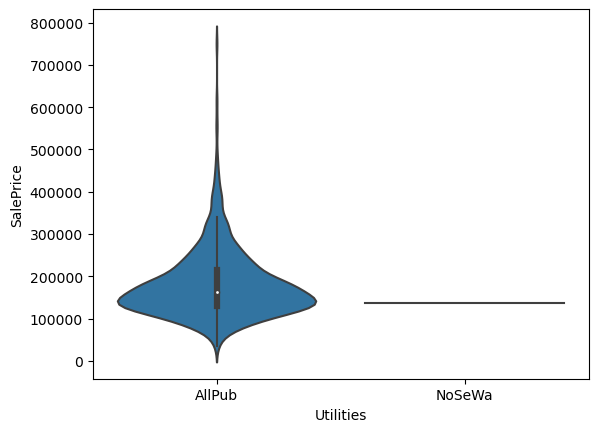

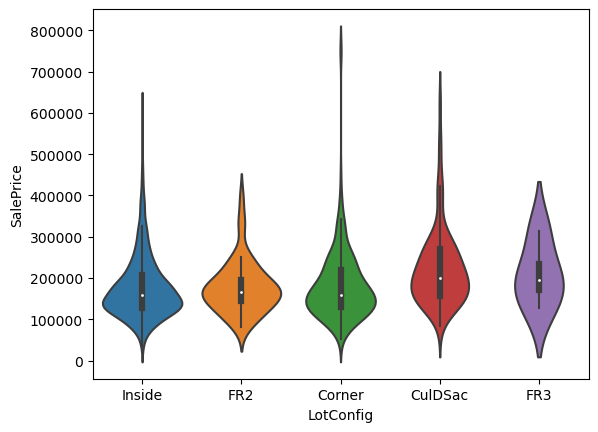

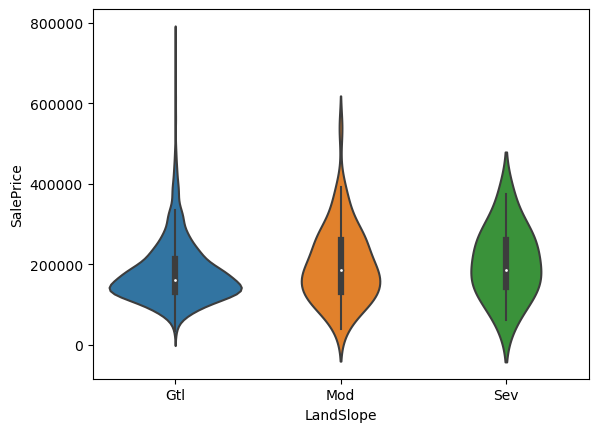

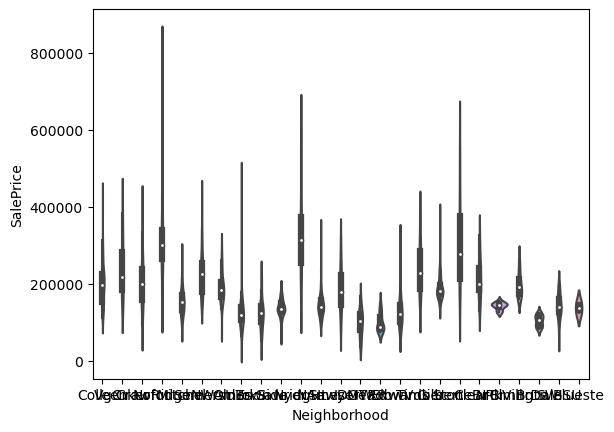

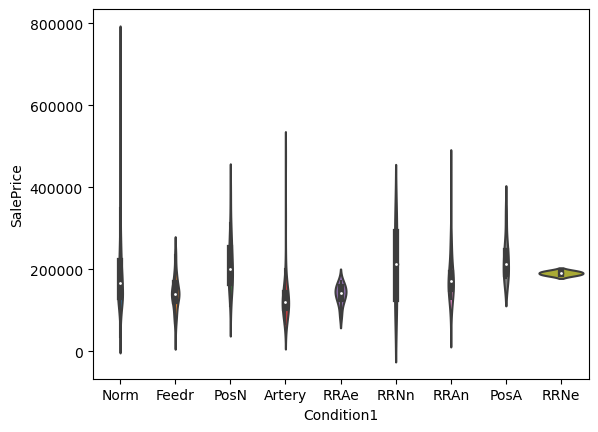

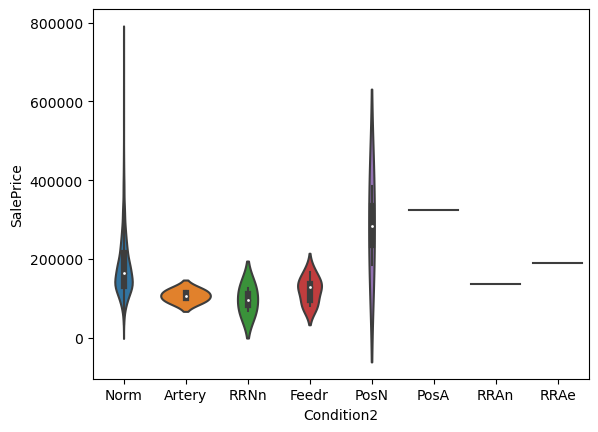

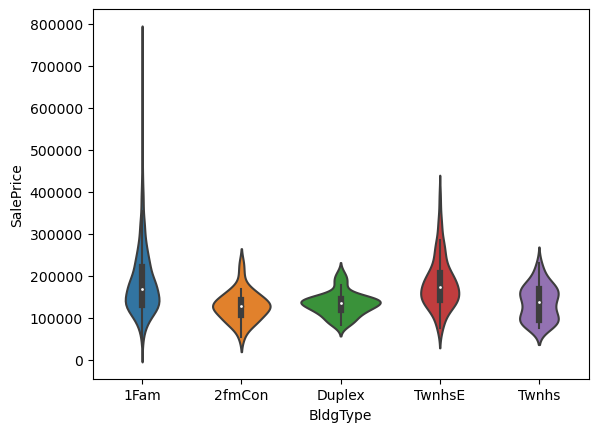

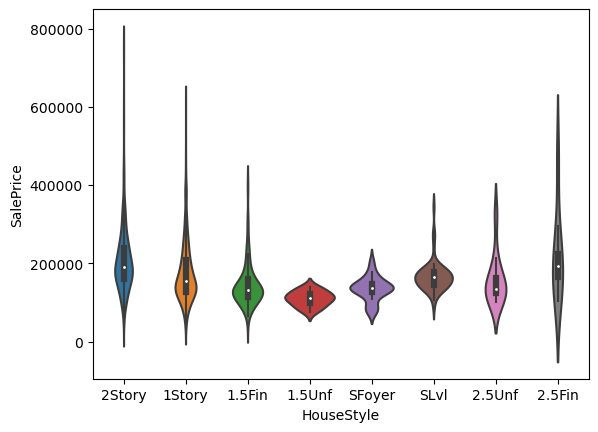

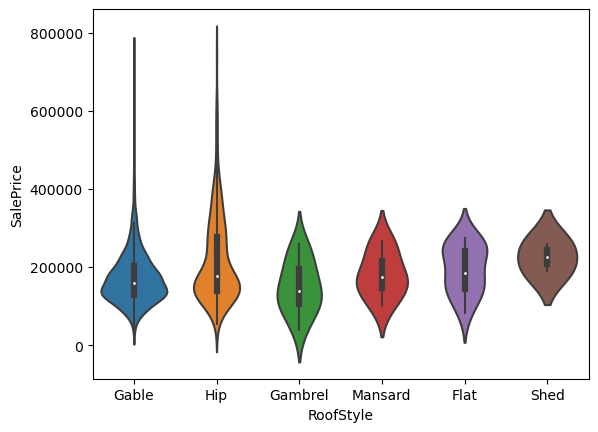

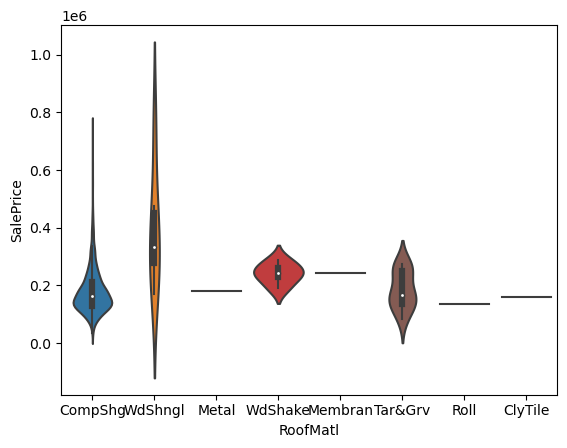

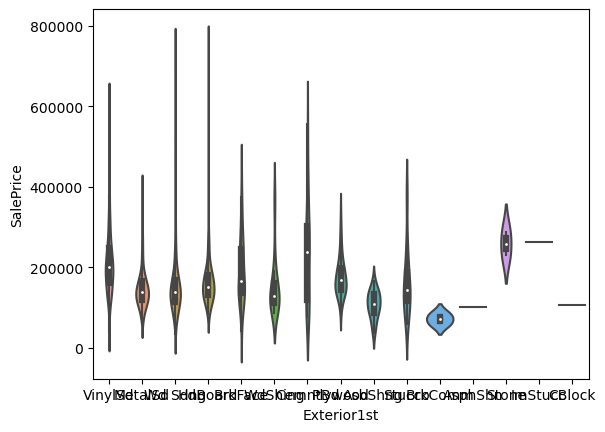

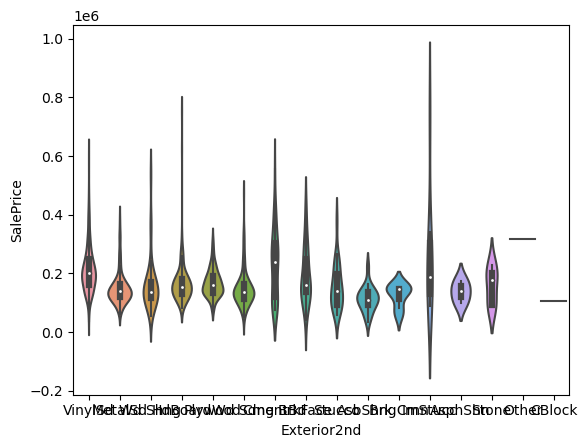

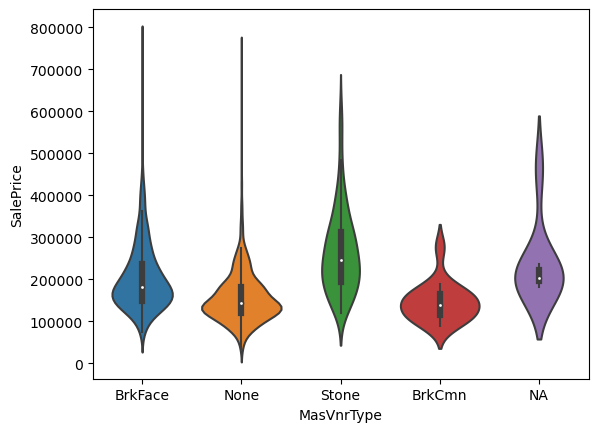

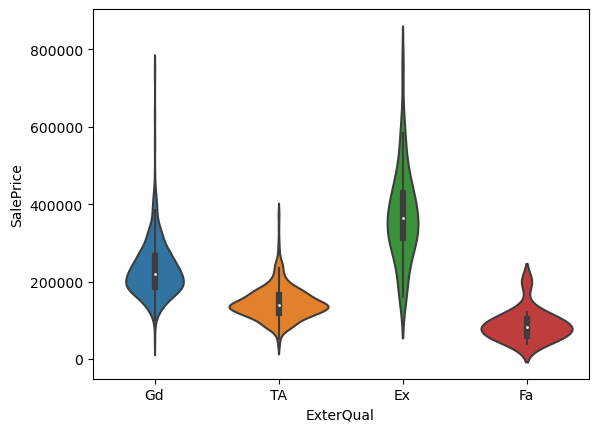

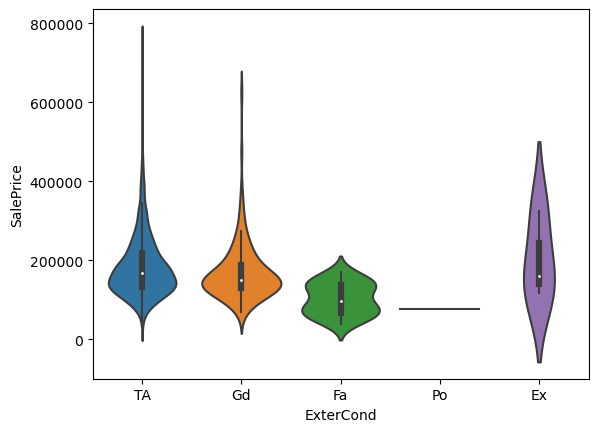

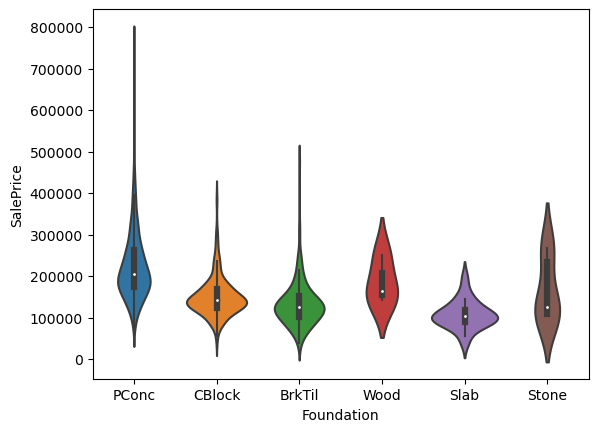

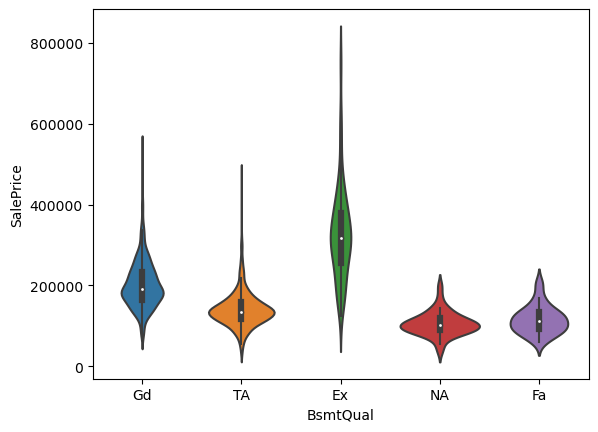

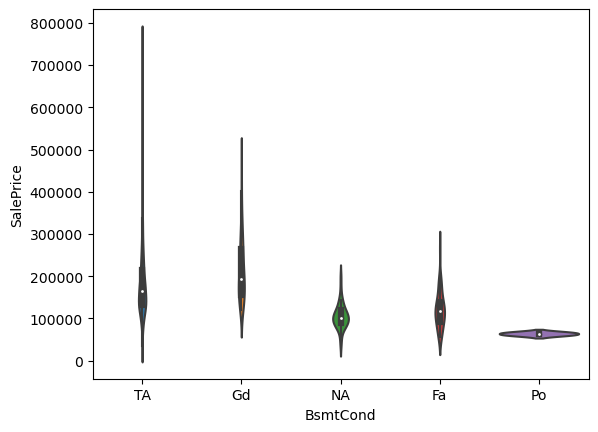

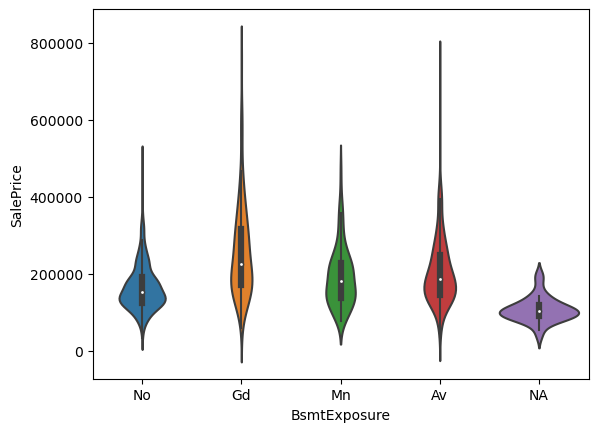

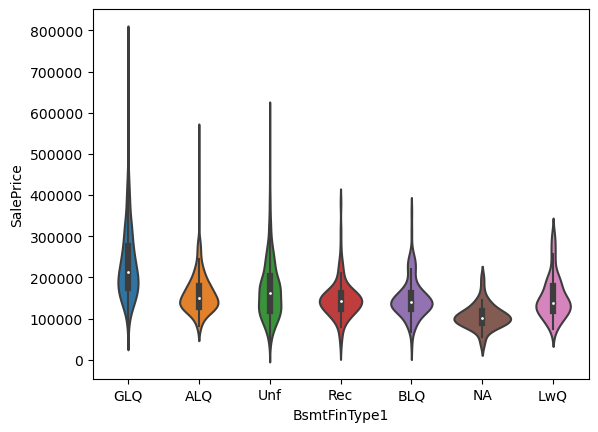

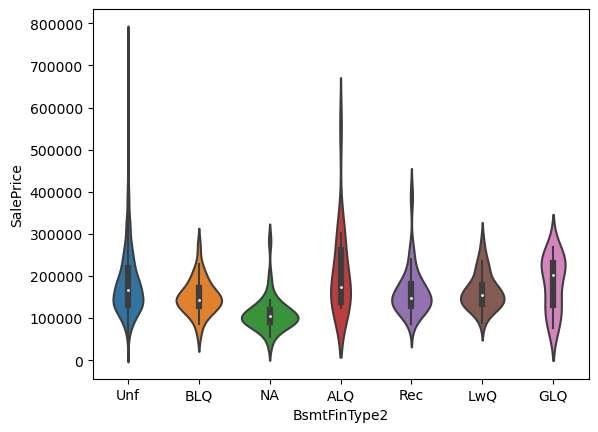

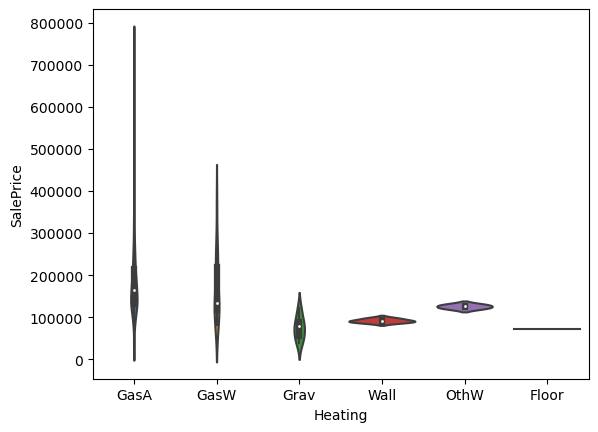

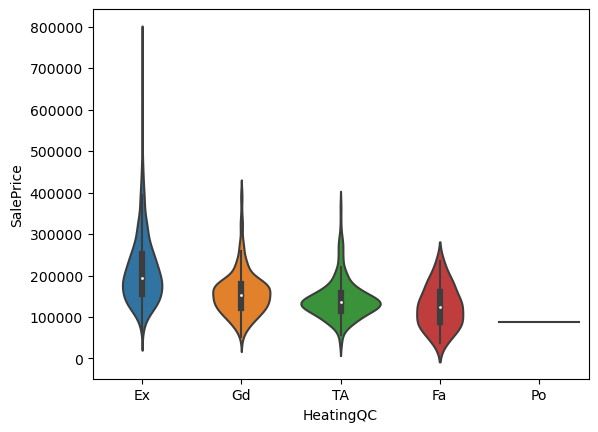

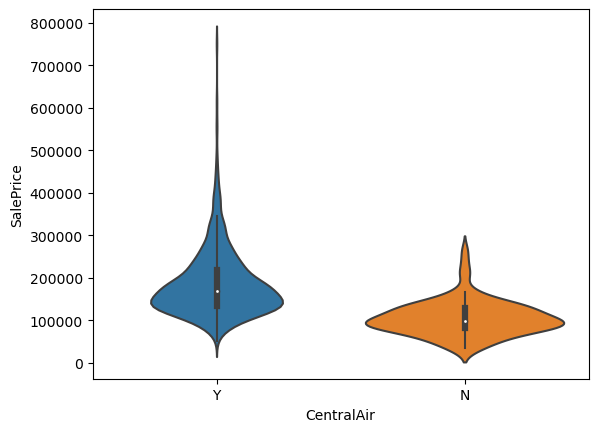

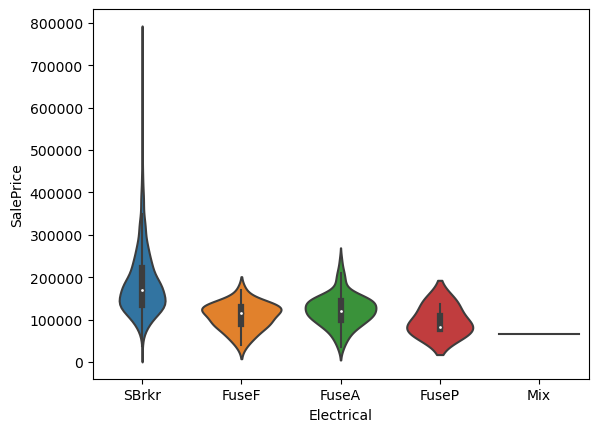

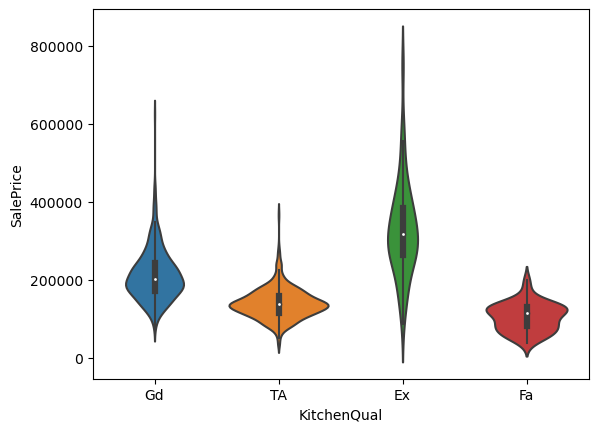

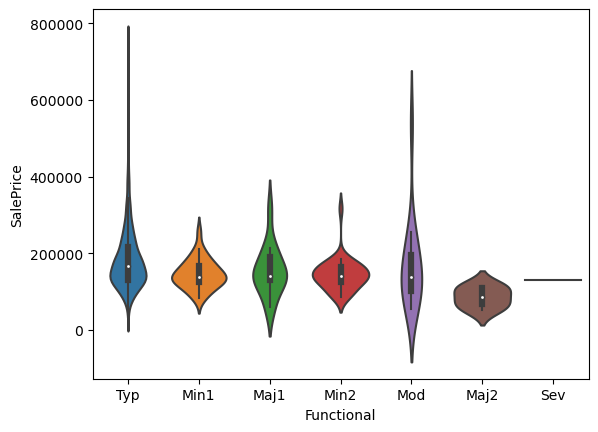

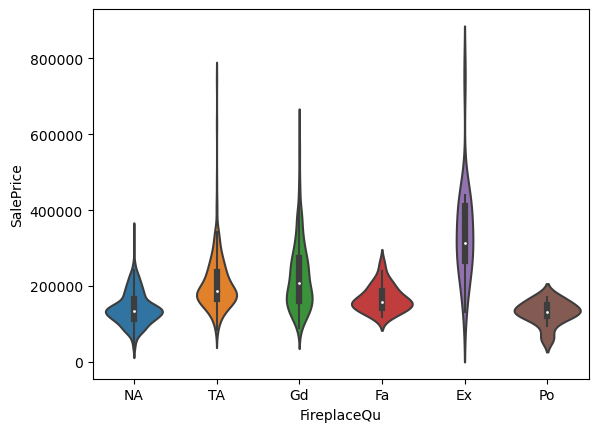

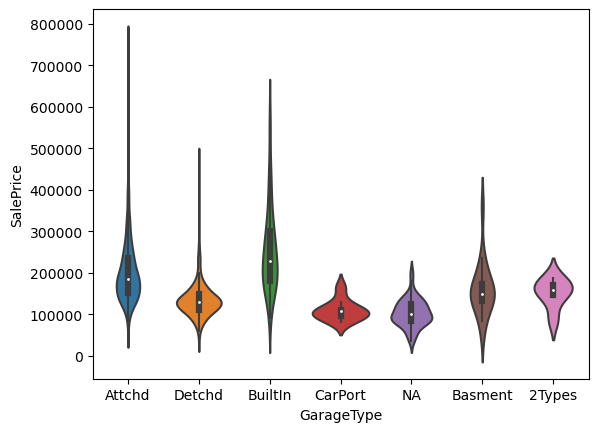

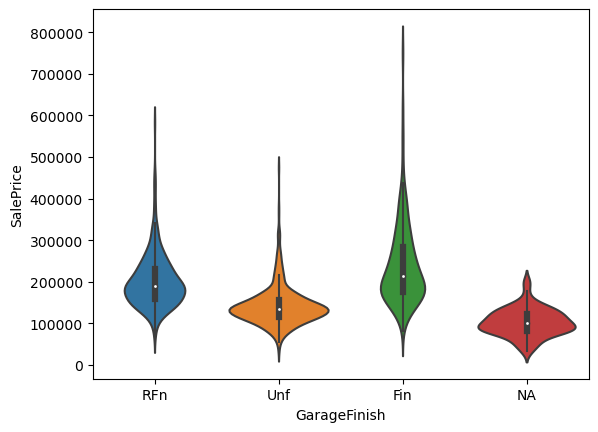

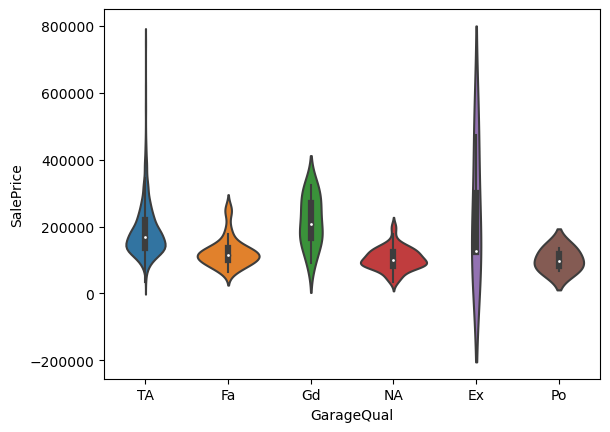

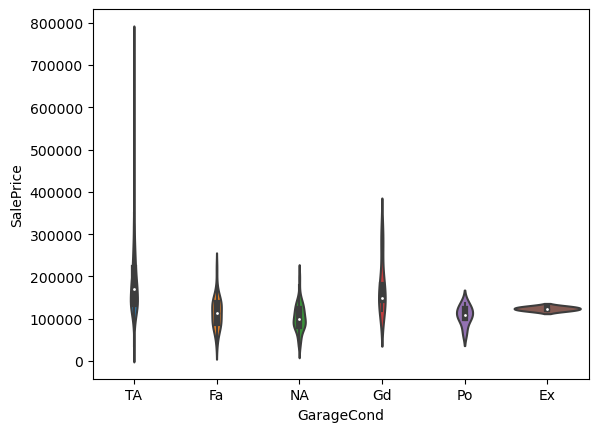

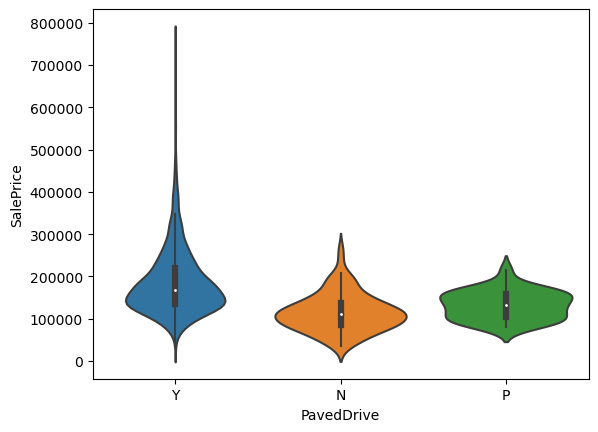

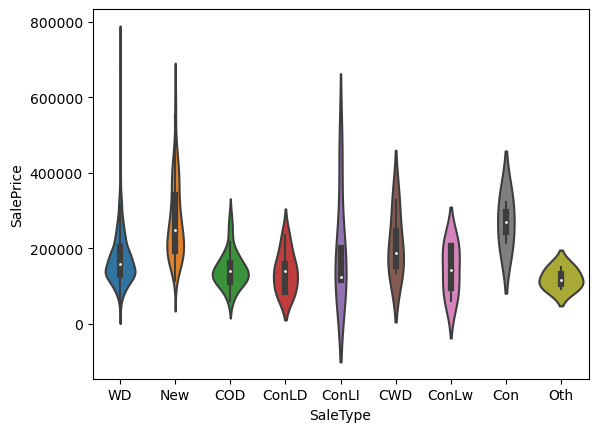

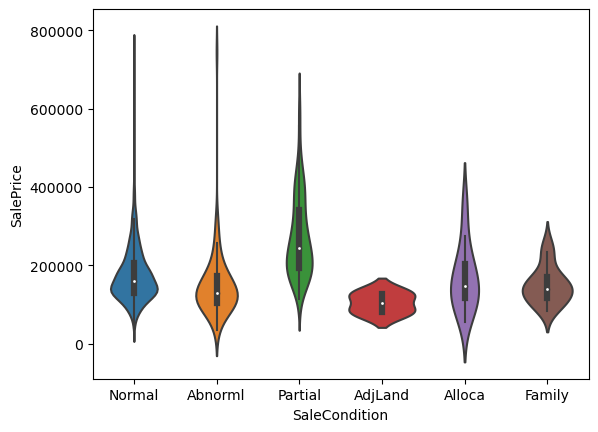

In [49]:
# plt.figure(figsize=(4,4))
for col in cat_features:
    sns.violinplot(data=df_train,x=col,y="SalePrice")
    plt.show()
    

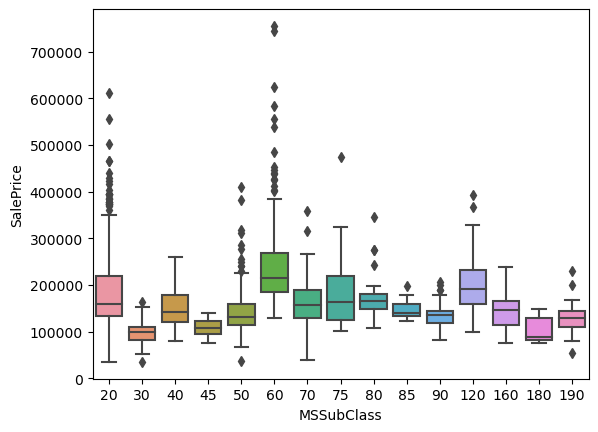

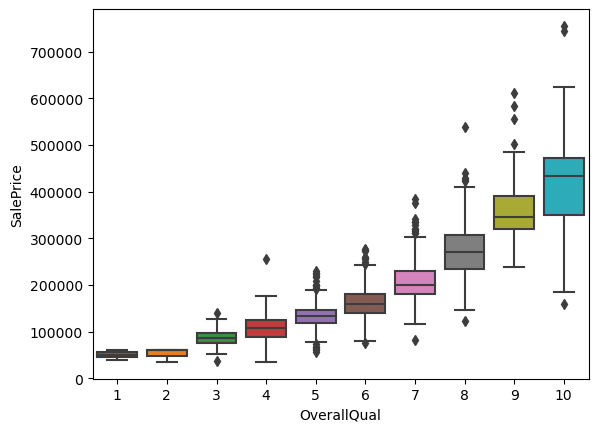

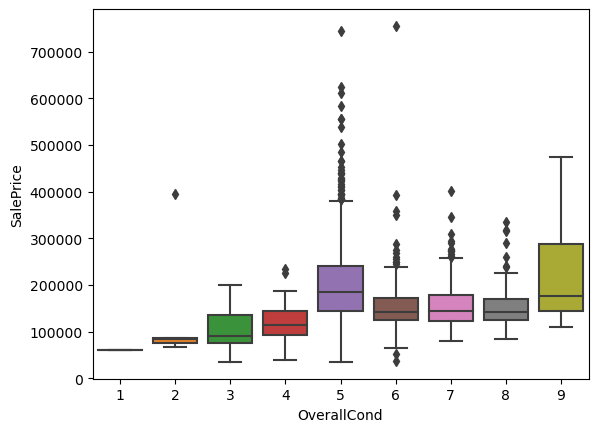

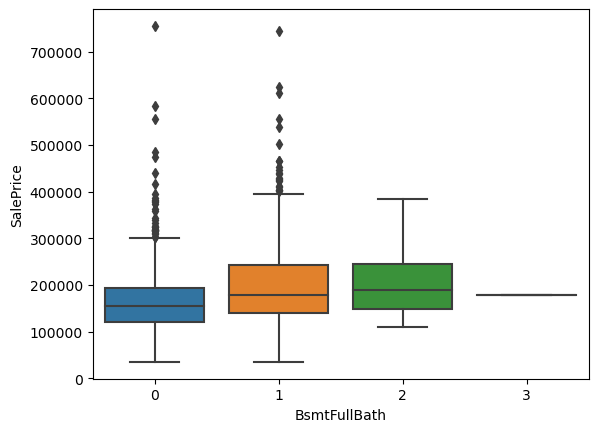

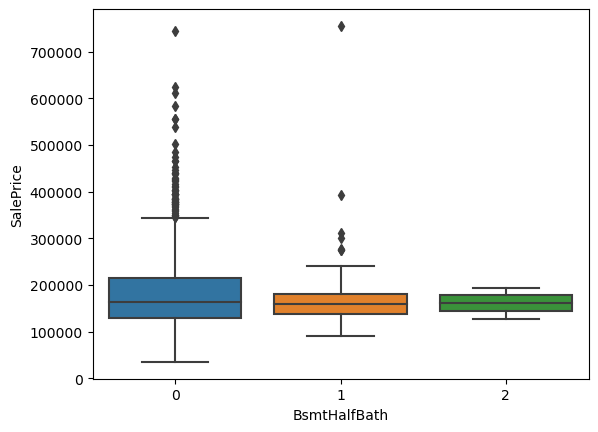

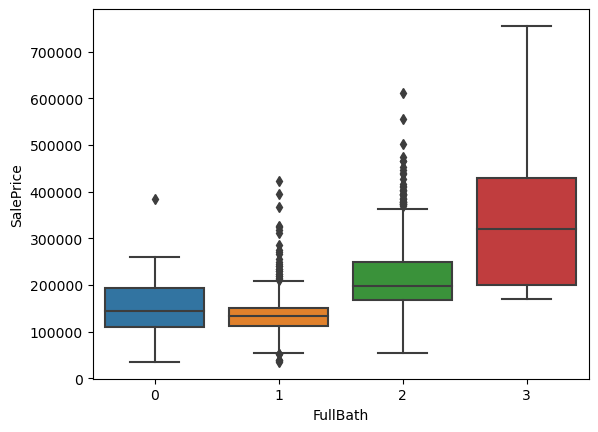

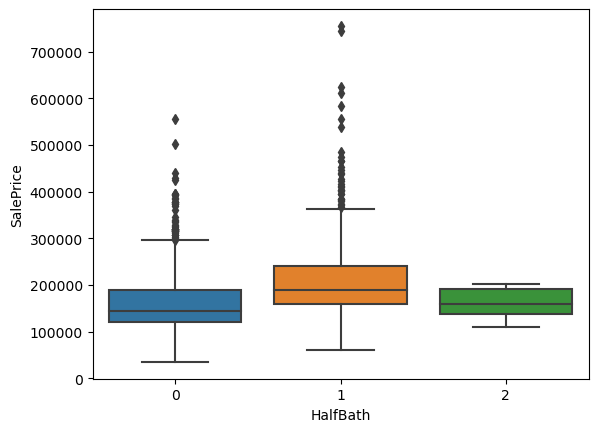

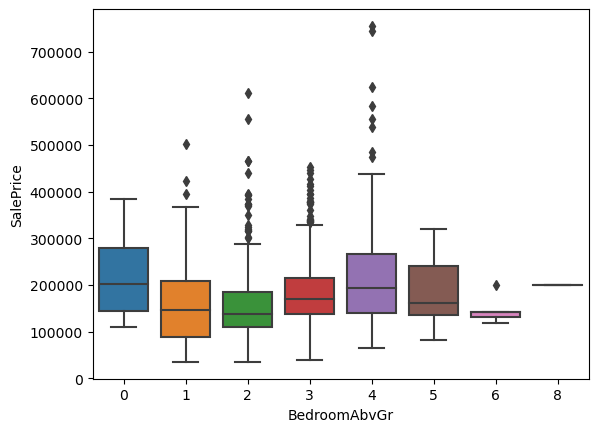

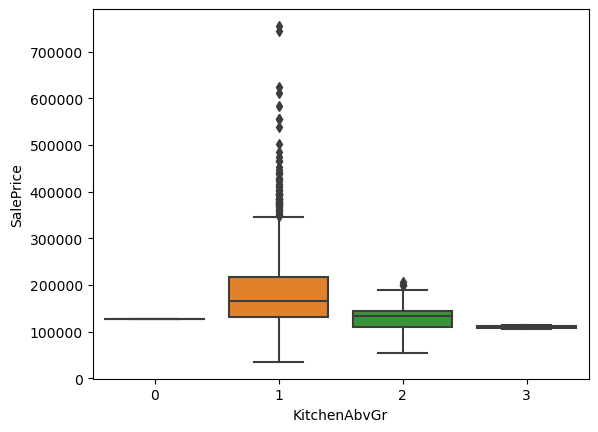

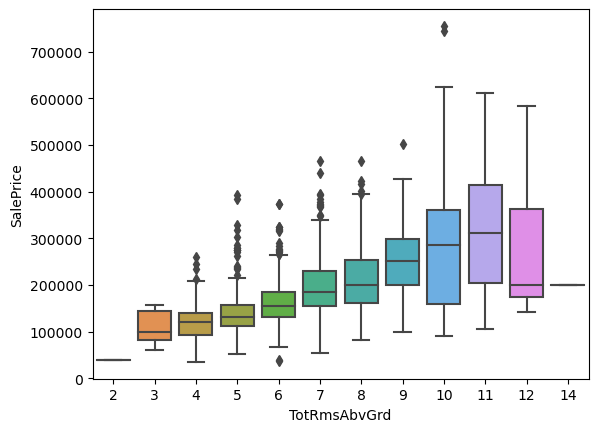

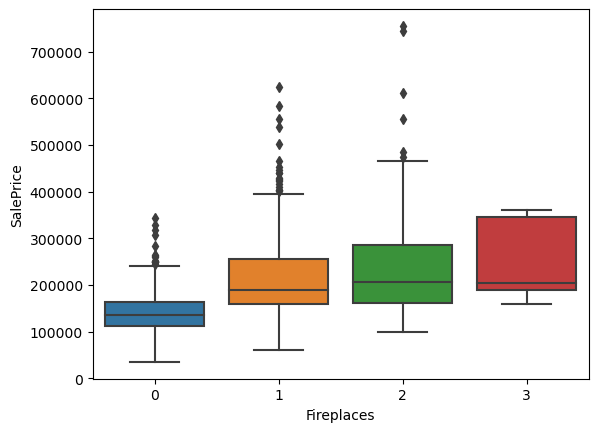

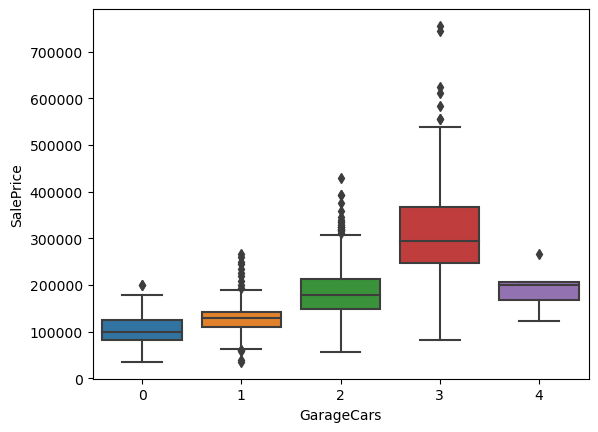

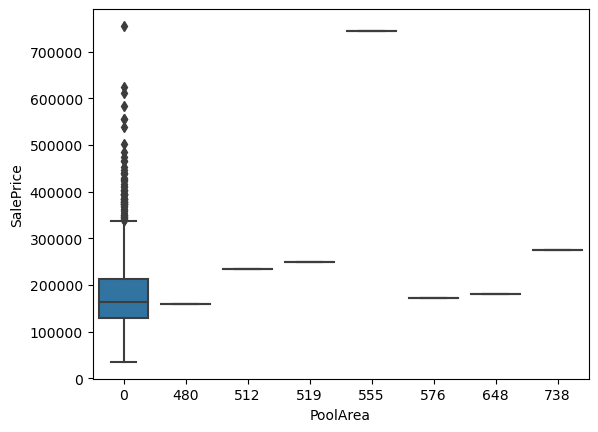

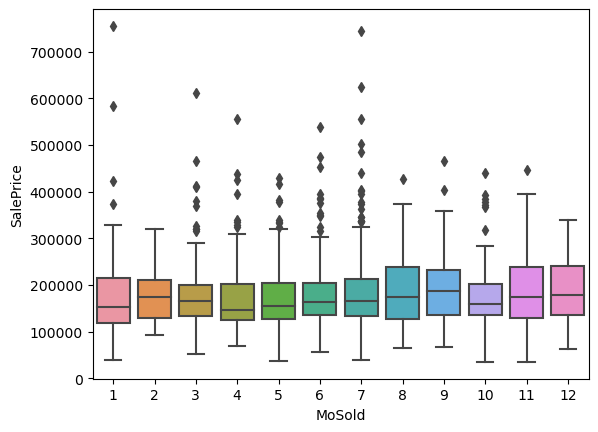

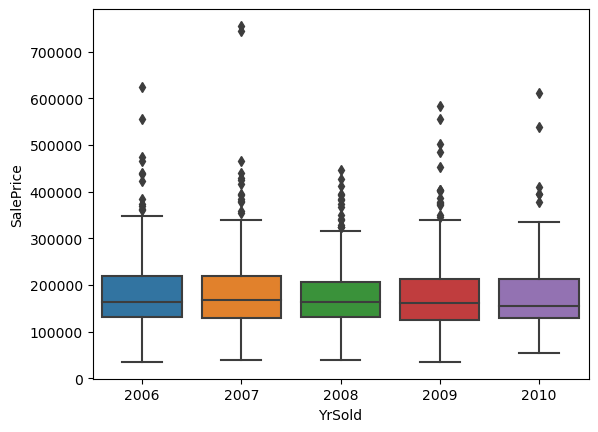

In [50]:
# plt.figure(figsize=(4,4))
for col in num_features:
    if len(df_train[col].value_counts())<20:
        sns.boxplot(data=df_train,x=col,y="SalePrice")
        plt.show()
    

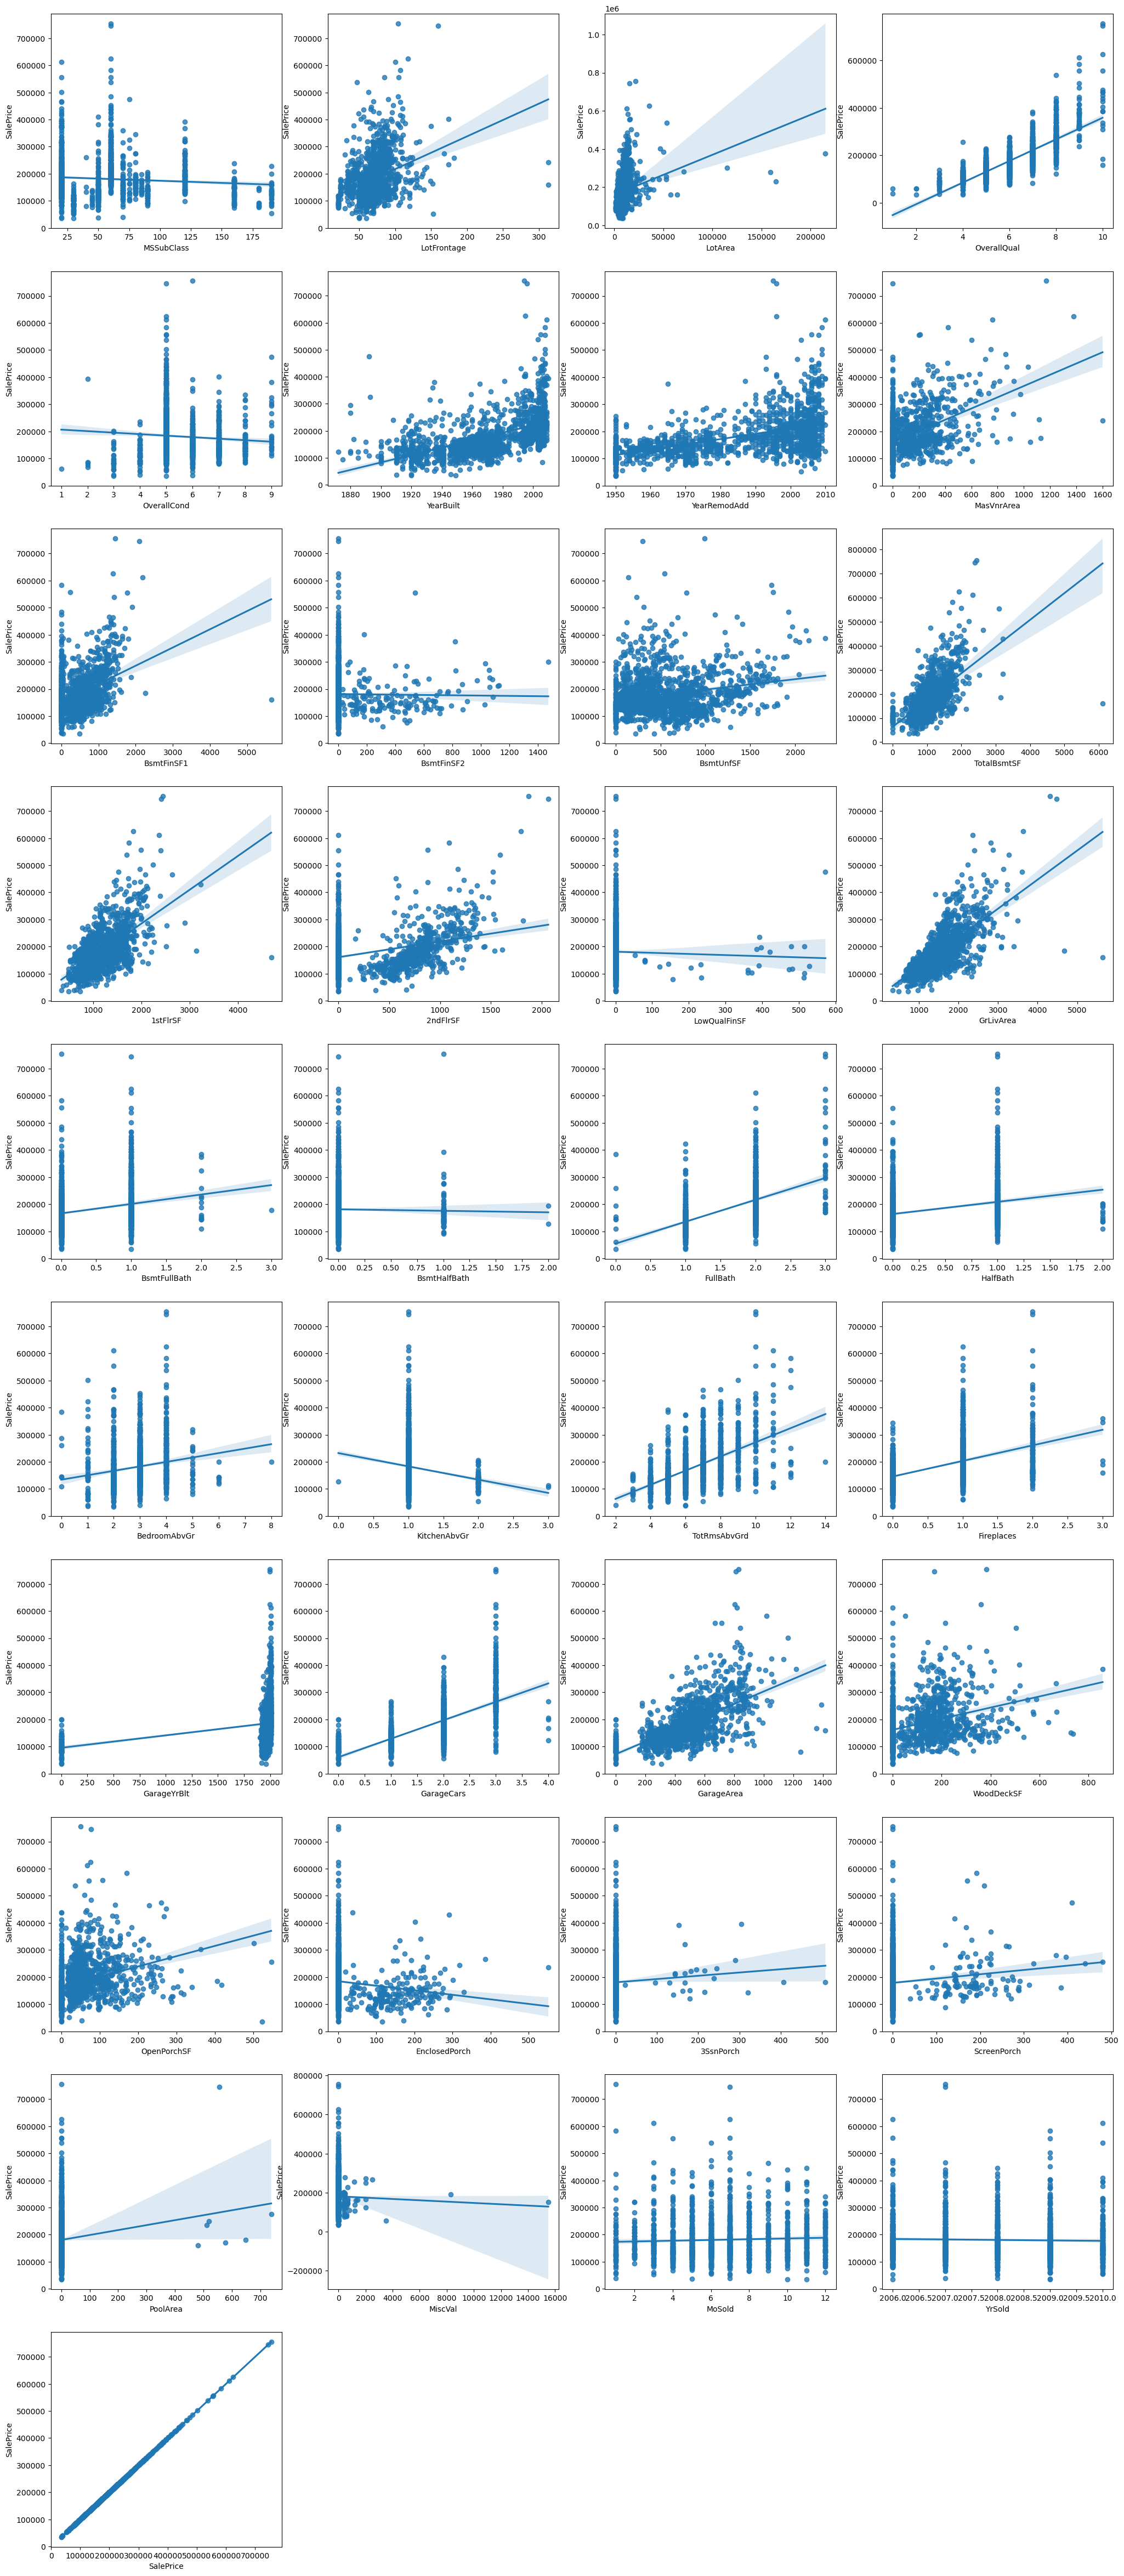

In [51]:
plt.figure(figsize=(25,60))
i = 1 
for col in num_features:
    plt.subplot(10,4,i)
    sns.regplot(data=df_train,x=col,y="SalePrice")
    i+=1 

## #Feature Engineering

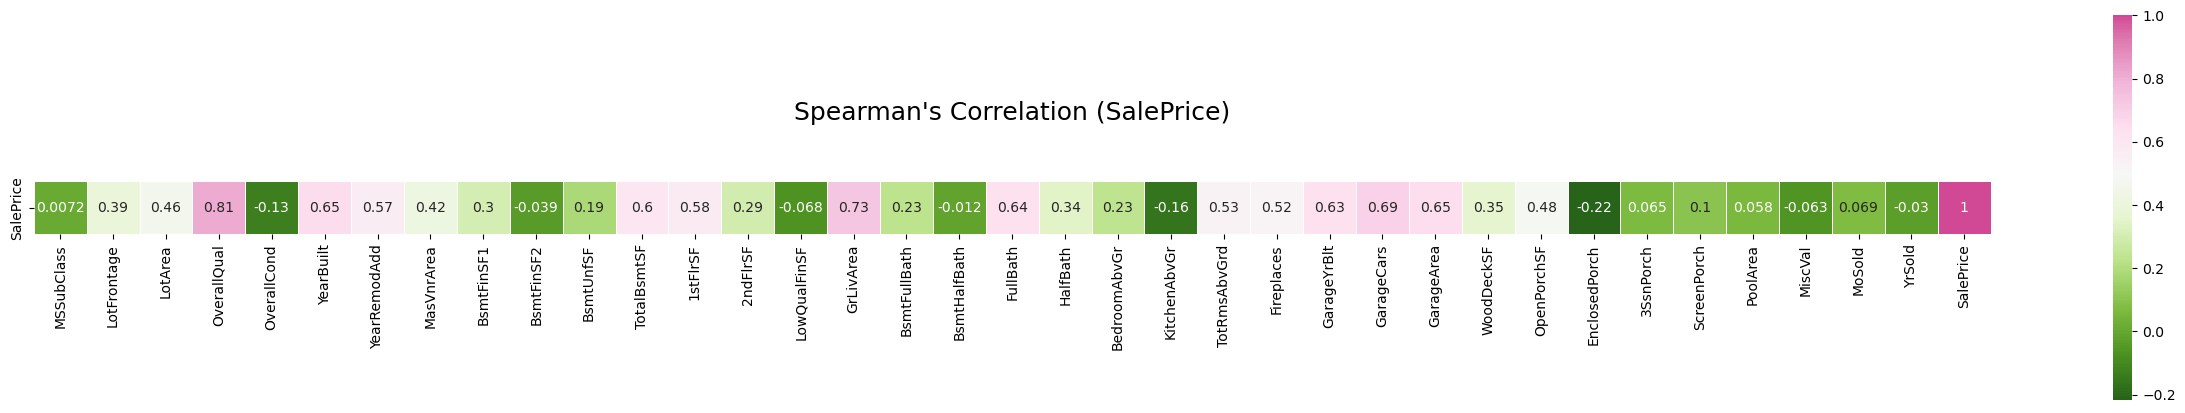

In [52]:
mat_corr=df_train.corr(method="spearman")[['SalePrice']] # since the distrubution  of value is not normally destributed 
                                                                # so using spearman correlation
plt.figure(figsize=(25,8), dpi=100)

sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1, 
            square=True, linewidths=.5,cmap="PiYG_r", cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation (SalePrice)", fontsize=18,y=2)
plt.tight_layout()
plt.show()

In [53]:
# Dropping features because the correlation of the features with SalePrice is very less and Also its not useful in prediction.
df_train.drop(['MiscVal','MoSold','YrSold'],axis=1,inplace=True)
df_test.drop(['MiscVal','MoSold','YrSold'],axis=1,inplace=True)

## #Encoding Categorical value to Numerical, using Ordinal Encoder

In [54]:
enc_Features = df_train.select_dtypes(exclude="number").columns
enc_Features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
from sklearn.preprocessing import OrdinalEncoder
odec = OrdinalEncoder()
df_train[enc_Features] = odec.fit_transform(df_train[enc_Features])
df_test[enc_Features] = odec.fit_transform(df_test[enc_Features])

## #Creating Base Model

In [56]:
base_train = df_train.copy()
base_test = df_test.copy()

Since 

"GrLivArea" = "1stFlrSF"+"2ndFlrSF"+"LowQualFinSF"

"TotalBsmtSF" = "BsmtFinSF1"+"BsmtFinSF2"+"BsmtUnfSF" 

creating creating different porch in a single column,</br>
"ExtraFeatureSF" ="WoodDeckSF"+"OpenPorchSF"+"EnclosedPorch"+"3SsnPorch"+"ScreenPorch"

In [57]:
porch_train = base_train["WoodDeckSF"]+base_train["OpenPorchSF"]+base_train["EnclosedPorch"]+base_train["3SsnPorch"]+base_train["ScreenPorch"]
porch_test = base_test["WoodDeckSF"]+base_test["OpenPorchSF"]+base_test["EnclosedPorch"]+base_test["3SsnPorch"]+base_test["ScreenPorch"]

In [58]:
base_train.insert(60,"Porch",porch_train)
base_test.insert(60,"Porch",porch_train)

In [59]:
base_train.drop(["1stFlrSF","2ndFlrSF","LowQualFinSF","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","WoodDeckSF","OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch"],axis=1,inplace=True)


In [60]:
base_test.drop(["1stFlrSF","2ndFlrSF","LowQualFinSF","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","WoodDeckSF","OpenPorchSF",
"EnclosedPorch",
"3SsnPorch",
"ScreenPorch"],axis=1,inplace=True)

In [61]:
display(base_train.head(1))
display(base_test.head(1))

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60       3.0         65.0     8450     1.0       3.0          3.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0           5.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         5.0            7            5       2003          2003   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       1.0         12.0         13.0         1.0       196.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        4.0         2.0       2.0       4.0           4.0   

   BsmtFinType1  BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           2.0           6.0          856      1.0        0.0         1.0   

   Electrical  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         4.0       1710             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   

   Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0          3.0         1.0       2003.0           2.0           2   

   Porch  GarageArea  GarageQual  GarageCond  PavedDrive  PoolArea  SaleType  \
0     61         548         5.0         5.0         2.0         0       8.0   

   SaleCondition  SalePrice  
0            4.0     208500

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20       2.0         80.0    11622     1.0       3.0          3.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0          12.0         1.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         2.0            5            6       1961          1961   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       0.0         10.0         12.0         3.0         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        3.0        4.0         1.0       4.0       4.0           4.0   

   BsmtFinType1  BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           5.0           3.0        882.0      0.0        4.0         1.0   

   Electrical  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         3.0        896           0.0           0.0         1         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1          3.0             5         6.0   

   Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0          3.0         1.0       1961.0           3.0         1.0   

   Porch  GarageArea  GarageQual  GarageCond  PavedDrive  PoolArea  SaleType  \
0     61       730.0         4.0         5.0         2.0         0       8.0   

   SaleCondition  
0            4.0

In [62]:
print("Train sahpe :",base_train.shape)
print("Test shape :",base_test.shape)

Train sahpe : (1460, 63)
Test shape : (1459, 62)


### #Spliting Independent and Dependent features

In [65]:
# X, y = base_train.iloc[:,:-1],base_train.iloc[:,-1]
X = base_train.drop('SalePrice',axis=1)
y = base_train.SalePrice

### #Train_Test_Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

### #Standardizing 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

### #Model

In [73]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

In [74]:
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error

In [75]:
base_model.score(X_test,y_test)

0.8634285391043776

In [76]:
y_pred = base_model.predict(X_test)

In [77]:
r2_score(y_test,y_pred)

0.8634285391043776

### #Performing on Test dataset

In [78]:
# base_model.predict(X_test)

In [80]:
base_test=scaler.fit_transform(base_test)

In [82]:
base_model.predict(base_test)

array([ 96217.82193492, 154585.38199216, 163685.22734547, ...,
       138341.04096854, 131917.96384223, 257127.95569823])

<p><span style="color: red;">UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(<span/><p/>
<p><span style="color: blue;"> This error raising only when model is fitted with train_test_split data.<span/><p/>
<p><span style="color: green;"><b>Solved:  I was performing the prediction on test.csv without scaling that data and model was fitted with scaled data.</b><span/><p/>

## #Linear Regression With SkewedHandling

In [120]:
# Making a copy of train dataset to perform logistic transformation to remove skewness and kurtosis
rs_train = df_train.copy()
rs_test = df_test.copy()

In [121]:
print(rs_test.shape)
print(rs_train.shape)
rs_test.head()

(1459, 72)
(1460, 73)


MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20       2.0         80.0    11622     1.0       3.0          3.0   
1          20       3.0         81.0    14267     1.0       0.0          3.0   
2          60       3.0         74.0    13830     1.0       0.0          3.0   
3          60       3.0         78.0     9978     1.0       0.0          3.0   
4         120       3.0         43.0     5005     1.0       0.0          1.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0          12.0         1.0         2.0   
1        0.0        0.0        0.0          12.0         2.0         2.0   
2        0.0        4.0        0.0           8.0         2.0         2.0   
3        0.0        4.0        0.0           8.0         2.0         2.0   
4        0.0        4.0        0.0          22.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         2.0            5            6       1961          1961   
1       0.0         2.0            6            6       1958          1958   
2       0.0         4.0            5            5       1997          1998   
3       0.0         4.0            6            6       1998          1998   
4       4.0         2.0            8            5       1992          1992   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       0.0         10.0         12.0         3.0         0.0   
1        3.0       0.0         11.0         13.0         1.0       108.0   
2        1.0       0.0         10.0         12.0         3.0         0.0   
3        1.0       0.0         10.0         12.0         1.0        20.0   
4        1.0       0.0          6.0          6.0         3.0         0.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        3.0        4.0         1.0       4.0       4.0           4.0   
1        3.0        4.0         1.0       4.0       4.0           4.0   
2        3.0        4.0         2.0       2.0       4.0           4.0   
3        3.0        4.0         2.0       4.0       4.0           4.0   
4        2.0        4.0         2.0       2.0       4.0           4.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           5.0       468.0           3.0       144.0      270.0        882.0   
1           0.0       923.0           6.0         0.0      406.0       1329.0   
2           2.0       791.0           6.0         0.0      137.0        928.0   
3           2.0       602.0           6.0         0.0      324.0        926.0   
4           0.0       263.0           6.0         0.0     1017.0       1280.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      0.0        4.0         1.0         3.0       896         0   
1      0.0        4.0         1.0         3.0      1329         0   
2      0.0        2.0         1.0         3.0       928       701   
3      0.0        0.0         1.0         3.0       926       678   
4      0.0        0.0         1.0         3.0      1280         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        896           0.0           0.0         1         0   
1             0       1329           0.0           0.0         1         1   
2             0       1629           0.0           0.0         2         1   
3             0       1604           0.0           0.0         2         1   
4             0       1280           0.0           0.0         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1          3.0             5         6.0   
1             3             1          2.0             6         6.0   
2             3             1          3.0             6         6.0   
3             3             1          2.

In [122]:
rs_train.isna().sum().sum()

0

In [123]:
rs_train['log_SalePrice'] = np.log(rs_train["SalePrice"])
rs_train.drop("SalePrice",axis=1,inplace=True)

In [124]:
# plt.figure(figsize=(30, 20))
# sns.heatmap(data=rs_train.corr(), cmap='Greens',annot=True)
# plt.show()

In [125]:
rs_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60       3.0         65.0     8450     1.0       3.0          3.0   
1          20       3.0         80.0     9600     1.0       3.0          3.0   
2          60       3.0         68.0    11250     1.0       0.0          3.0   
3          70       3.0         60.0     9550     1.0       0.0          3.0   
4          60       3.0         84.0    14260     1.0       0.0          3.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0           5.0         2.0         2.0   
1        0.0        2.0        0.0          24.0         1.0         2.0   
2        0.0        4.0        0.0           5.0         2.0         2.0   
3        0.0        0.0        0.0           6.0         2.0         2.0   
4        0.0        2.0        0.0          15.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         5.0            7            5       2003          2003   
1       0.0         2.0            6            8       1976          1976   
2       0.0         5.0            7            5       2001          2002   
3       0.0         5.0            7            5       1915          1970   
4       0.0         5.0            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       1.0         12.0         13.0         1.0       196.0   
1        1.0       1.0          8.0          8.0         3.0         0.0   
2        1.0       1.0         12.0         13.0         1.0       162.0   
3        1.0       1.0         13.0         15.0         3.0         0.0   
4        1.0       1.0         12.0         13.0         1.0       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        4.0         2.0       2.0       4.0           4.0   
1        3.0        4.0         1.0       2.0       4.0           1.0   
2        2.0        4.0         2.0       2.0       4.0           2.0   
3        3.0        4.0         0.0       4.0       1.0           4.0   
4        2.0        4.0         2.0       2.0       4.0           0.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2.0         706           6.0           0        150          856   
1           0.0         978           6.0           0        284         1262   
2           2.0         486           6.0           0        434          920   
3           0.0         216           6.0           0        540          756   
4           2.0         655           6.0           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      1.0        0.0         1.0         4.0       856       854   
1      1.0        0.0         1.0         4.0      1262         0   
2      1.0        0.0         1.0         4.0       920       866   
3      1.0        2.0         1.0         4.0       961       756   
4      1.0        0.0         1.0         4.0      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   
1             3             1          3.0             6         6.0   
2             3             1          2.0             6         6.0   
3             3             1          2.

In [126]:
rs_train.dtypes.value_counts()

float64    43
int64      30
dtype: int64

In [127]:
ord_data = rs_train.select_dtypes(include="object").columns

In [128]:
from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder()
rs_train[ord_data] = oec.fit_transform(rs_train[ord_data])
rs_test[ord_data] = oec.fit_transform(rs_test[ord_data])

In [129]:
rs_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60       3.0         65.0     8450     1.0       3.0          3.0   
1          20       3.0         80.0     9600     1.0       3.0          3.0   
2          60       3.0         68.0    11250     1.0       0.0          3.0   
3          70       3.0         60.0     9550     1.0       0.0          3.0   
4          60       3.0         84.0    14260     1.0       0.0          3.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0           5.0         2.0         2.0   
1        0.0        2.0        0.0          24.0         1.0         2.0   
2        0.0        4.0        0.0           5.0         2.0         2.0   
3        0.0        0.0        0.0           6.0         2.0         2.0   
4        0.0        2.0        0.0          15.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         5.0            7            5       2003          2003   
1       0.0         2.0            6            8       1976          1976   
2       0.0         5.0            7            5       2001          2002   
3       0.0         5.0            7            5       1915          1970   
4       0.0         5.0            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       1.0         12.0         13.0         1.0       196.0   
1        1.0       1.0          8.0          8.0         3.0         0.0   
2        1.0       1.0         12.0         13.0         1.0       162.0   
3        1.0       1.0         13.0         15.0         3.0         0.0   
4        1.0       1.0         12.0         13.0         1.0       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        4.0         2.0       2.0       4.0           4.0   
1        3.0        4.0         1.0       2.0       4.0           1.0   
2        2.0        4.0         2.0       2.0       4.0           2.0   
3        3.0        4.0         0.0       4.0       1.0           4.0   
4        2.0        4.0         2.0       2.0       4.0           0.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2.0         706           6.0           0        150          856   
1           0.0         978           6.0           0        284         1262   
2           2.0         486           6.0           0        434          920   
3           0.0         216           6.0           0        540          756   
4           2.0         655           6.0           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      1.0        0.0         1.0         4.0       856       854   
1      1.0        0.0         1.0         4.0      1262         0   
2      1.0        0.0         1.0         4.0       920       866   
3      1.0        2.0         1.0         4.0       961       756   
4      1.0        0.0         1.0         4.0      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   
1             3             1          3.0             6         6.0   
2             3             1          2.0             6         6.0   
3             3             1          2.

In [130]:
# X = rs_train.drop("log_SalePrice",axis=1)
# y = rs_train["log_SalePrice"]

In [131]:
X1,y1 = rs_train.iloc[:,:-1],rs_train.iloc[:,-1]

In [132]:
y1

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [133]:
print(X1.shape)
print(y1.shape)

(1460, 72)
(1460,)


In [134]:
display(X1.head(1))
display(y1.head(1))

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60       3.0         65.0     8450     1.0       3.0          3.0   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0        0.0        4.0        0.0           5.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         5.0            7            5       2003          2003   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       1.0         12.0         13.0         1.0       196.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        4.0         2.0       2.0       4.0           4.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2.0         706           6.0           0        150          856   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      1.0        0.0         1.0         4.0       856       854   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   

   Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0          3.0         1.0       2003.0           2.0           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         5.0         5.0         2.0           0           61   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SaleType  SaleCondition  
0              0          0            0         0       8.0            4.0

0    12.247694
Name: log_SalePrice, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=20,random_state=33)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [138]:
from sklearn.metrics import r2_score

In [139]:
y1_pred = model.predict(X1_test)

In [140]:
np.exp(y1_pred)

array([264758.57775842, 163110.30040387, 171715.58892223, 222810.3786739 ,
       270401.17129716, 401347.36766573, 172865.35963811, 118617.3385526 ,
       136644.25008254, 298917.30133792, 115245.36726585, 116957.74464684,
        79638.83810004, 331328.05984321, 137206.90222651, 135136.1143631 ,
       245664.31680867, 170568.04786658, 102236.6986352 , 149078.8961081 ])

In [141]:
r2_score(y1_test,y1_pred)

0.9155174268105584

In [142]:
model.score(X1_test,y1_test)

0.9155174268105584

In [143]:
rs_test = scaler.transform(rs_test)

In [144]:
np.exp(model.predict(rs_test))

array([115409.54808698, 154435.77939604, 169281.00525624, ...,
       148649.90178486, 118381.04432053, 240391.10262825])